## H$_n$ data

In [2]:
import numpy as np
import json
from os import walk

In [39]:
data = {"H2":{"data":[]}, 
        "H3":{"data":[]}, 
        "H4":{"data":[]}, 
        "H5":{"data":[]}
        }

kinds = list(data.keys())
#read all data:
#f_dir = "C:/Users/beryl/Documents/WU/Main Topic/PythonFilesImportant/Data/Files/" # main pc dir
f_dir = "/users/baribowo/Documents/maintopic/PythonFilesImportant/Data/Files/" # office dir
_, _, onlyfiles = next(walk(f_dir))
print(onlyfiles)
for f in onlyfiles:
    f = open(f_dir+f)
    f_data = json.load(f)
    #data["H2"]["data"]
    print(f_data.keys(), len(f_data["data"]), f_data["kind"])
    data[f_data["kind"]]["data"].append(f_data["data"]) #aggregate data (probably a bad idea) using .extend, .append results in different set
    

['H3_Su_class_1.txt', 'H4_Hinde_QZ.txt', 'H3_mielke_main.txt', 'H5_Tablero.txt', 'H3_Su_class_2.txt', 'H2_Kolos.txt', 'H4_Hinde_TZ.txt', 'artificial_H2_Kolos.txt', 'H2_Wolniewicz_BO.txt', 'H3_mielke_vdw.txt', 'H3_mielke_ac.txt', 'H3_mielke_coll.txt']
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 1409 H3
dict_keys(['kind', 'name', 'data', 'H21_data', 'H22_data', 'accuracy', 'info']) 1653 H4
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 3263 H3
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 2799 H5
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 991 H3
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 87 H2
dict_keys(['data', 'kind', 'name', 'accuracy', 'info']) 855 H4
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 2000 H2
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 670 H2
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 220 H3
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 140 H3
dict_keys(['data', 'accuracy

2000

In [179]:
# plot to check H2 data 
import matplotlib.pyplot as plt
model_num = 0
print("total data:", len(data["H5"]["data"][model_num]))
#r, energy = np.array(data["H2"]["data"][model_num]).T #only for H2
Ab = np.array(data["H5"]["data"][model_num])
r = Ab[:,0:Ab.shape[1]-1]
energy = Ab[:,Ab.shape[1]-1:Ab.shape[1]].reshape(-1)
'''
plt.rcParams["figure.figsize"] = (20,15)
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('H data')
ax1.plot(r, energy)

from scipy.stats import norm
ax2.plot(r, norm.pdf(r),'r-', lw=5, alpha=0.6, label='norm pdf r')
ax3.plot(energy, norm.pdf(energy),'r+', lw=5, alpha=0.6, label='norm pdf energy')
'''

total data: 2799


'\nplt.rcParams["figure.figsize"] = (20,15)\nfig, (ax1, ax2, ax3) = plt.subplots(3)\nfig.suptitle(\'H data\')\nax1.plot(r, energy)\n\nfrom scipy.stats import norm\nax2.plot(r, norm.pdf(r),\'r-\', lw=5, alpha=0.6, label=\'norm pdf r\')\nax3.plot(energy, norm.pdf(energy),\'r+\', lw=5, alpha=0.6, label=\'norm pdf energy\')\n'

In [180]:
'''Raise the dimension of the data'''
A = np.zeros((r.shape[0],10)) # data matrix with increased dimension, to accomodate higher H clusters (up to H5)
#A[:,0] = r # H2 exclusive
A[:,:r.shape[1]] = r # Hx
print(A)

[[ 6.      6.      6.     ...  1.4    12.     11.918 ]
 [ 5.      6.4     5.     ... 11.4    12.8     1.4   ]
 [ 1.4012  6.4012 11.4012 ...  5.      6.4012  1.4012]
 ...
 [ 8.      8.      8.     ...  8.      8.     13.0639]
 [ 8.      8.      8.     ... 11.3137 16.     11.3137]
 [10.     10.      9.0738 ...  9.0738  9.0738 14.0001]]


In [181]:
'''
Split the training and test data
'''
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(A, energy, test_size=0.25, random_state=13)
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (2099, 10)
Training Labels Shape: (2099,)
Testing Features Shape: (700, 10)
Testing Labels Shape: (700,)


In [182]:
'''
Setup the Random Forest parameters
'''
from sklearn.ensemble import RandomForestRegressor

#generate the RF model
rf = RandomForestRegressor(n_estimators= 1000, random_state=13, verbose=1)

#train the model on training data
rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   12.0s finished


RandomForestRegressor(n_estimators=1000, random_state=13, verbose=1)

In [183]:
'''Model evaluation on training set'''
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

preds = rf.predict(x_train)

#Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_train, preds))
print('Root Mean Squared Error :', round(rmse, 2))

#Pearson Correlation Coefficient (PCC) score
pcc = pearsonr(y_train, preds)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Root Mean Squared Error : 0.01


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [184]:
'''Model evaluation on Test set'''
preds = rf.predict(x_test)

#Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('Root Mean Squared Error :', round(rmse, 2))

#Pearson Correlation Coefficient (PCC) score
pcc = pearsonr(y_test, preds)
print('Pearson Correlation Coefficient :', round(pcc[0],2))

Root Mean Squared Error : 0.03
Pearson Correlation Coefficient : 0.92


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


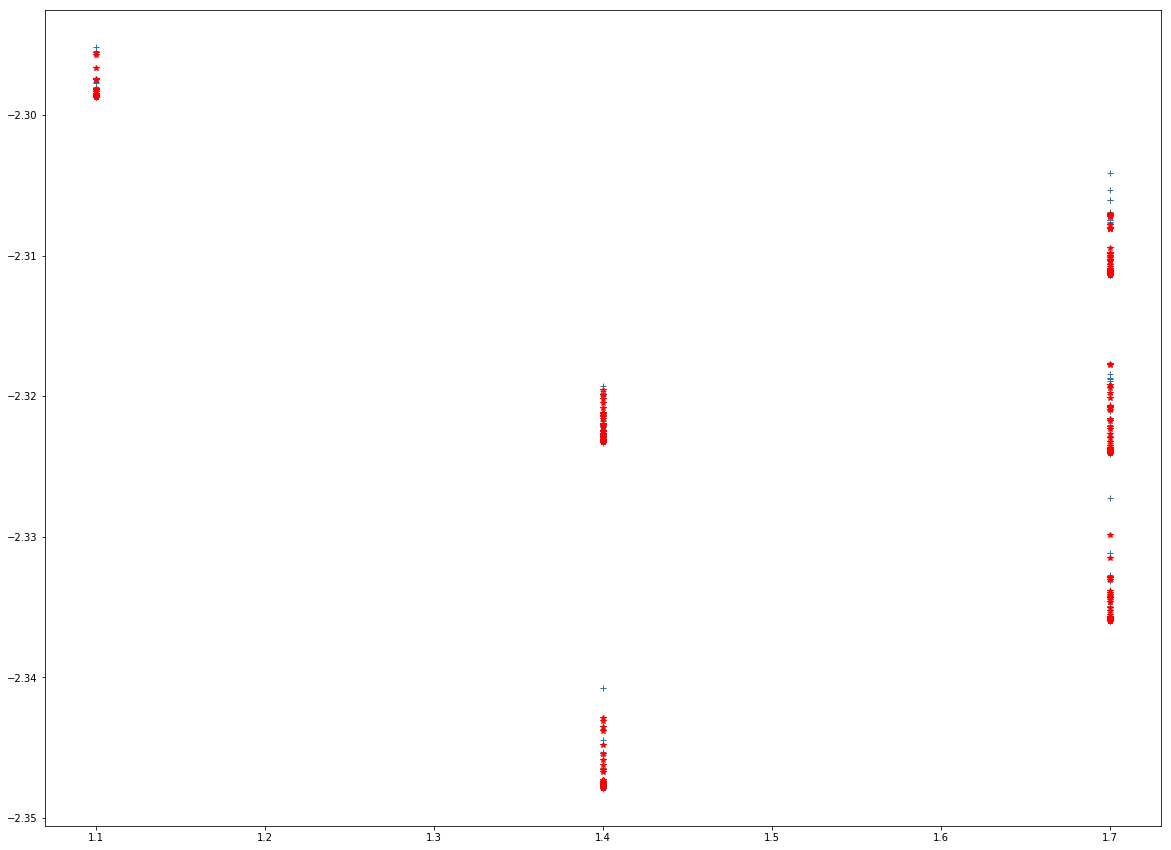

In [170]:
'''actual vs prediction'''
plt.plot(x_test[:,0], y_test, "+", label="actual")
plt.plot(x_test[:,0], preds, "r*", label="predicted")

### Testing with sparse matrix feature for up to 5th H cluster

In [215]:
'''Assemble the data based on model number (default is 0)'''
model_num = 0
lengths = np.array([len(data[kind]["data"][model_num]) for kind in kinds])
sum_length = np.sum(lengths)
A = np.zeros((sum_length, 10)) #feature (A) sparse matrix
b = np.zeros((sum_length)) #target (b)
iterat = 0
for i in range(len(kinds)):
    temp_data = np.array(data[kinds[i]]["data"][model_num])
    feature = temp_data[:, :len(temp_data[0])-1]
    label = temp_data[:,-1]
    A[iterat:iterat+lengths[i], :feature.shape[1]] = feature
    b[iterat:iterat+lengths[i]] = label
    iterat += lengths[i]

[0. 0. 0. ... 0. 0. 0.]
[[0.4, 0.8797972000000001], [0.45, 0.6490718], [0.5, 0.47337300000000004], [0.55, 0.33722929999999995], [0.6, 0.2303659], [0.65, 0.14563859999999995], [0.7, 0.07797390000000004], [0.75, 0.02366429999999997], [0.8, -0.020055600000000062], [0.9, -0.08364220000000011], [1.0, -0.12453850000000011], [1.1, -0.15005620000000008], [1.2, -0.16493420000000003], [1.3, -0.17234590000000005], [1.35, -0.17396269999999991], [1.39, -0.1744517000000001], [1.4, -0.17447440000000003], [1.401, -0.17447459999999992], [1.4011, -0.17447459999999992], [1.41, -0.1744599], [1.45, -0.1740558000000001], [1.5, -0.1728537000000001], [1.6, -0.1685798999999999], [1.7, -0.16245700000000007], [1.8, -0.15506700000000007], [1.9, -0.1468495999999999], [2.0, -0.1381311999999999], [2.1, -0.12915619999999994], [2.2, -0.12012329999999993], [2.3, -0.1111724999999999], [2.4, -0.10241269999999991], [2.5, -0.09392730000000005], [2.6, -0.08578100000000011], [2.7, -0.0780164000000001], [2.8, -0.0706700000000

In [217]:
'''
Split the training and test data
'''
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(A, b, test_size=0.25, random_state=13)
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (4461, 10)
Training Labels Shape: (4461,)
Testing Features Shape: (1487, 10)
Testing Labels Shape: (1487,)


In [218]:
'''
Setup the Random Forest parameters
'''
from sklearn.ensemble import RandomForestRegressor

#generate the RF model
rf = RandomForestRegressor(n_estimators= 1000, random_state=13, verbose=1)

#train the model on training data
rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   17.9s finished


RandomForestRegressor(n_estimators=1000, random_state=13, verbose=1)

In [219]:
'''Model evaluation on training set'''
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

preds = rf.predict(x_train)

#Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_train, preds))
print('Root Mean Squared Error :', round(rmse, 2))

#Pearson Correlation Coefficient (PCC) score
pcc = pearsonr(y_train, preds)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.6s finished


Root Mean Squared Error : 0.01


In [220]:
'''Model evaluation on Test set'''
preds = rf.predict(x_test)

#Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('Root Mean Squared Error :', round(rmse, 2))

#Pearson Correlation Coefficient (PCC) score
pcc = pearsonr(y_test, preds)
print('Pearson Correlation Coefficient :', round(pcc[0],2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Root Mean Squared Error : 0.02
Pearson Correlation Coefficient : 1.0


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.3s finished


## H$_2$, OH, O$_2$ data

In [33]:
#Query routines
def query_one_var(value, key, list_data):
    #to query data where data[key] = value
    query_data = []
    for data in list_data:
        if data[key] == value:
            query_data.append(data)
    return query_data

def query_one_var_indices(value, key, list_data):
    #returns the indices instead of the data
    q_idxes = []
    for i, data in enumerate(list_data):
        if data[key] == value:
            q_idxes.append(i)
    return q_idxes

def query_many_vars_indices(values, keys, list_data):
    #queries many keys at once, e.g.: "mol" == "OH", "state" == "$X^2\Pi$", "author" == "pradhan(1995)", etc
    #the entries within the values and keys list must be consistent, e.g. 1st index is state, 2nd index is author,etc..
    q_idxes = []
    for i, data in enumerate(list_data):
        hit = 0
        for j, key in enumerate(keys):
            if data[key] == values[j]:
                hit += 1 #if a key hits, increment
        if hit == len(keys):
            q_idxes.append(i)
    return q_idxes

def many_queries_many_vars_indices(dicts, list_data):
    #queries many values and many keys at once!!, e.g.: [{"mol" = "OH", "state" = "$X^2\Pi$"}, {"mol" = "OH", "state" = "$X^2\Sigma$"}, etc]
    q_idxes = []
    for i, data in enumerate(list_data):
        for j, dicti in enumerate(dicts):
            hit = 0
            for k, key in enumerate(dicti):
                value = dicti[key]
                if data[key] == value:
                    hit += 1 #if a key hits, increment
            if hit == len(dicti):
                q_idxes.append(i)
    return q_idxes


def data_conversion(R, V, R_unit="angstrom", V_unit="ev"):
    #convert R to bohr, V to hartree (currently from 'angstrom' and 'ev' only)
    #distance:
    if R_unit or R:
        if R_unit=="angstrom":
            R *= 1.8897259886
    
    #energy:
    if V_unit or V:
        if V_unit == "ev":
            V *= 0.0367502
        elif V_unit=="milihartree":
            V *= 1e-3
    return R, V

#matplotlib
import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams.update({'font.size': 15})
import matplotlib.pyplot as plt


#the shapes of plots:
shapes = ['b-o','r-x','g-^', 
          'b-*', 'r-D', 'b-<', 
          'g-X', 'r->','b-s', 
          'r-o','g-h','b-X', 
          'r-s', 'g-<', 'b-+']

def plot_per_state(idxes, list_data, shapes, title=None, xlabel=None, ylabel=None):
    #plotting routine
    #idxes = queried indexes
    #list_data = data collection
    #shapes = list of plot shapes
    plt.subplots(figsize=(15, 10))
    leg = []; shapeidx = 0
    #sort data by year:
    years = []
    for idx in idxes:
        data = list_data[idx]
        length = len(data["author"])
        years.append(data["author"][length-5:length-1])
    years_idxes = np.argsort(years)[::-1]
    idxes = np.array(idxes)
    sorted_idxes = idxes[years_idxes]
    #plot by sorted data:
    for idx in sorted_idxes:
        if "method" in list_data[idx]:
            legend = list_data[idx]["author"] + ", " +list_data[idx]["method"]
        else:
            legend = list_data[idx]["author"]
        leg.append(legend)
        plt.plot(np.log10(list_data[idx]["R"]), list_data[idx]["V"], shapes[shapeidx])
        shapeidx += 1    
    plt.legend(leg)
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)

### Data cleaning

In [633]:
f_dir = "/users/baribowo/Code/Python/pes/data/" # office dir
_, _, onlyfiles = next(walk(f_dir))
print(onlyfiles)

        
list_data = []

#clean OH data:
R_values = []
V_values = []
fname = 'OH_multi_states_eV'
with open(f_dir+fname) as f:
    lines = [line.rstrip() for line in f]
    for i in range(len(lines)):
        if lines[i][0] == '$':
            if i==0:
                data = {'mol':'OH'}
                splitline = lines[i].split()
                data['state'] = splitline[0]
                data['author'] = splitline[1]
            else:
                data["R"] = np.array(R_values)
                data["V"] = np.array(V_values)
                R_values = []
                V_values = []
                list_data.append(data)
                data = {'mol':'OH'}
                splitline = lines[i].split()
                data['state'] = splitline[0]
                data['author'] = splitline[1]
        else:
            splitline = lines[i].split()
            if splitline[1][0]=="−":
                splitline[1] = splitline[1].replace("−","-")
            R_values.append(float(splitline[0]))
            V_values.append(float(splitline[1]))
            if i==len(lines)-1:
                data["R"] = np.array(R_values)
                data["V"] = np.array(V_values)
                R_values = []
                V_values = []
                list_data.append(data)
        '''
        elif (i==len(lines)-1):
            data["R"] = np.array(R_values)
            data["V"] = np.array(V_values)
            R_values = []
            V_values = []
            list_data.append(data)
        '''
        

array = []
fname = 'OH_Chu_et_al_1974_hartree'
states = ["$X^2\Pi$ MCSCF", "$X^2\Pi$ CI", "$A^2\Sigma^+$ MCSCF", "$A^2\Sigma^+$ CI"]
with open(f_dir+fname) as f:
    lines = [line.rstrip() for line in f]
    for i in range(1, len(lines)):
        splitlines = lines[i].split()
        arr = np.array(splitlines, dtype = 'float')
        array.append(arr)
array = np.array(array)
array = array.T
for i in range(len(states)):
    data = {'mol':'OH','author':'Chu et al 1974'}; data["state"] = states[i]; data["R"] = array[0]; data["V"] = array[i+1]
    list_data.append(data)
            
#clean O2 data:
array = []
states = None
fname = 'O2_data_Bytautas2010_milihartree'
with open(f_dir+fname) as f:
    lines = [line.rstrip() for line in f]
    states = lines[0].split()
    for i in range(1, len(lines)):
        splitlines = lines[i].split()
        arr = np.array(splitlines, dtype = 'float')
        array.append(arr)
array = np.array(array)
array = array.T
for i in range(1, len(states)):
    data = {'mol':'O2','author':'Bytautas2010'}; data["state"] = states[i]; data["R"] = array[0]; data["V"] = array[i]
    list_data.append(data)

#H2 data:
fnames = ['H2_Kolos.txt', 'H2_Wolniewicz_BO.txt']
for fname in fnames:
    f = open(f_dir+fname)
    f_data = json.load(f)
    #data["H2"]["data"]
    print(f_data.keys(), len(f_data["data"]), f_data["kind"])
    arr = np.array(f_data["data"]).T
    data = {'mol':'H2','author':fname.split('.')[0], 'state':'ground', 'R':arr[0], 'V':arr[1]}
    list_data.append(data)

for data in list_data:
    print(data)

['hxoy_data.npy', 'OH_and_ions_Werner1983_multi_states_hartree', 'OH_Chu_et_al_1974_hartree', 'OH_multi_states_eV', 'H2_Kolos.txt', 'O2_data_Bytautas2010_milihartree', 'artificial_H2_Kolos.txt', 'H2_Wolniewicz_BO.txt', 'hxoy_data_corr.npy', 'H2plus_Sharp(1971)_multistates']
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 87 H2
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 670 H2
{'mol': 'OH', 'state': '$X^2\\Pi$', 'author': 'Pradhan(1995)', 'R': array([1.  , 1.1 , 1.2 , 1.25, 1.3 , 1.5 , 1.6 , 1.75, 1.9 , 2.  , 2.1 ,
       2.25, 2.4 , 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.5 , 4.75,
       5.  , 5.25, 5.5 , 6.  , 7.  , 7.1 , 7.2 ]), 'V': array([ 1.16670e+01,  6.13800e+00,  2.29300e+00,  8.47230e-01,
       -4.71180e-01, -3.37316e+00, -4.05089e+00, -4.50268e+00,
       -4.53042e+00, -4.40562e+00, -4.20861e+00, -3.83143e+00,
       -3.40631e+00, -3.11515e+00, -2.40954e+00, -1.78479e+00,
       -1.26939e+00, -8.70850e-01, -5.80780e-01, -3.80620e-01,
       -1.61350

data lengths: [29, 32, 24]
data lengths: [21, 14, 24]
data lengths: [23, 23, 23]
data lengths: [20, 20, 20]
data lengths: [22, 22, 22, 22]


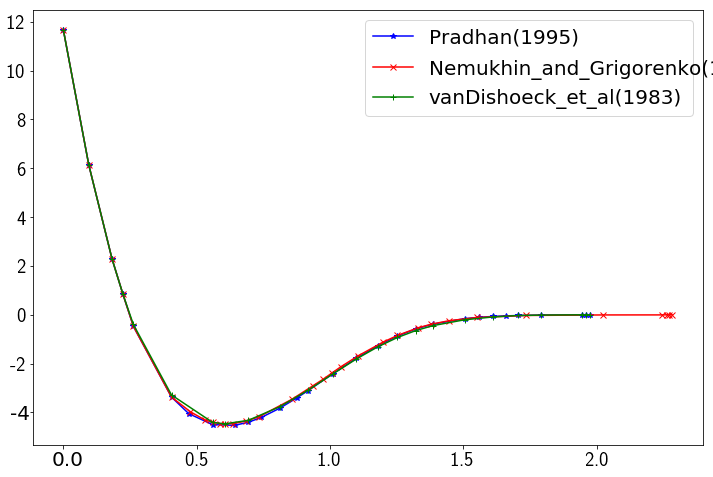

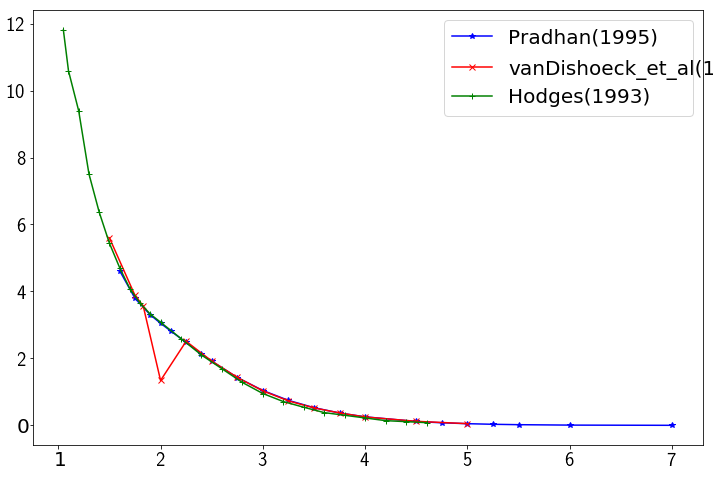

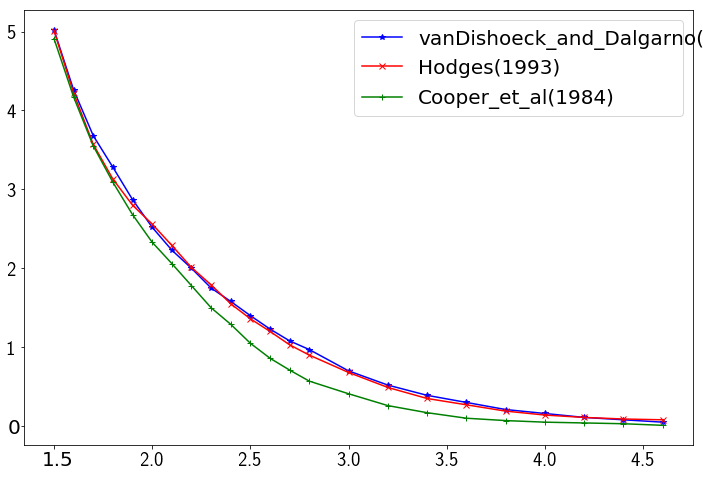

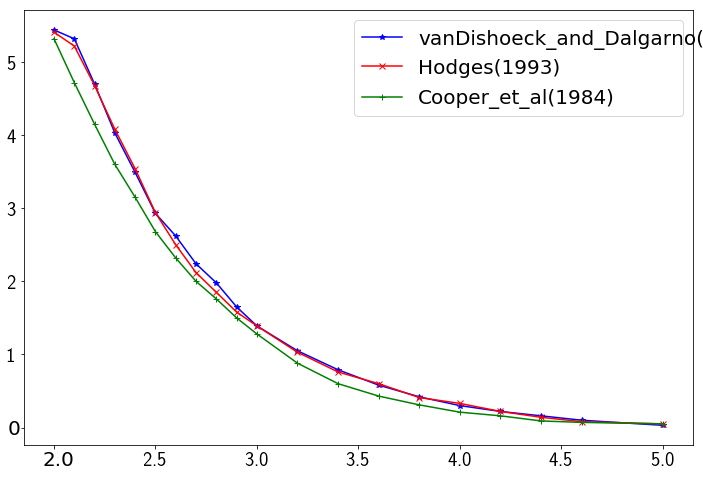

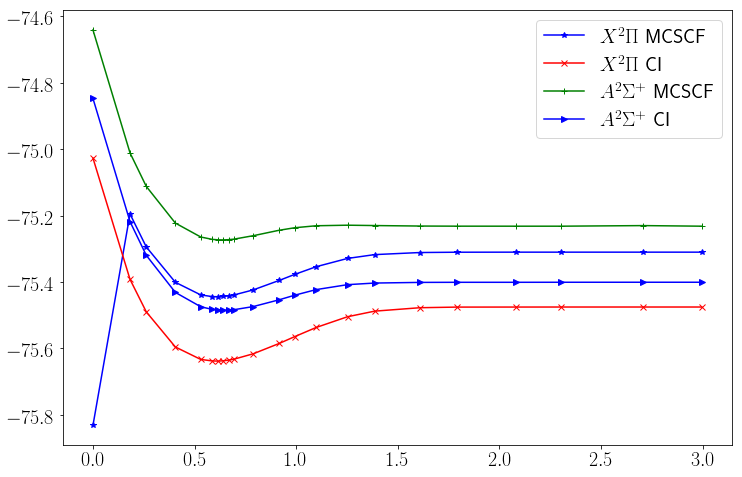

In [635]:
shapes = ['b-*','r-x','g-+', 'b->', 'r-D', 'b-<', 'g-X']
#  OH :
# All from Shizgal98:
#OH X^2\Pi:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.log(list_data[0]['R']), list_data[0]['V'], 'b-*')
ax.plot(np.log(list_data[1]['R']), list_data[1]['V'], 'r-x')
ax.plot(np.log(list_data[2]['R']), list_data[2]['V'], 'g-+')
auths = []
for i in range(3):
    auths.append(list_data[i]['author'])
ax.legend(auths)
print("data lengths:",[len(list_data[i]['R']) for i in range(3)])

#OH ^2\Sigma^-:
#the correct way to fetch:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
auths = []
for i in range(len(list_data)):
    if (list_data[i]['state'] == '$^2\\Sigma^-$') and (list_data[i]['mol'] == 'OH'):
        idxes.append(i)
        auths.append(list_data[i]['author'])
for i, idx in enumerate(idxes):
    ax.plot(list_data[idx]['R'], list_data[idx]['V'], shapes[i])
ax.legend(auths)
print("data lengths:",[len(list_data[i]['R']) for i in idxes])


#OH ^4\Sigma^-:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
auths = []
for i in range(len(list_data)):
    if (list_data[i]['state'] == '$^4\\Sigma^-$') and (list_data[i]['mol'] == 'OH'):
        idxes.append(i)
        auths.append(list_data[i]['author'])
for i, idx in enumerate(idxes):
    ax.plot(list_data[idx]['R'], list_data[idx]['V'], shapes[i])
ax.legend(auths)
print("data lengths:",[len(list_data[i]['R']) for i in idxes])


#OH ^4\\Pi:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
auths = []
for i in range(len(list_data)):
    if (list_data[i]['state'] == '$^4\\Pi$') and (list_data[i]['mol'] == 'OH'):
        idxes.append(i)
        auths.append(list_data[i]['author'])
for i, idx in enumerate(idxes):
    ax.plot(list_data[idx]['R'], list_data[idx]['V'], shapes[i])
ax.legend(auths)
print("data lengths:",[len(list_data[i]['R']) for i in idxes])

# All from Chu et al 1974:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
states = []
for i in range(len(list_data)):
    if (list_data[i]['author'] == 'Chu et al 1974') and (list_data[i]['mol'] == 'OH'):
        idxes.append(i)
        states.append(list_data[i]['state'])
for i, idx in enumerate(idxes):
    ax.plot(np.log(list_data[idx]['R']), list_data[idx]['V'], shapes[i])
ax.legend(states)
print("data lengths:",[len(list_data[i]['R']) for i in idxes])

data lengths: [26, 26, 26]


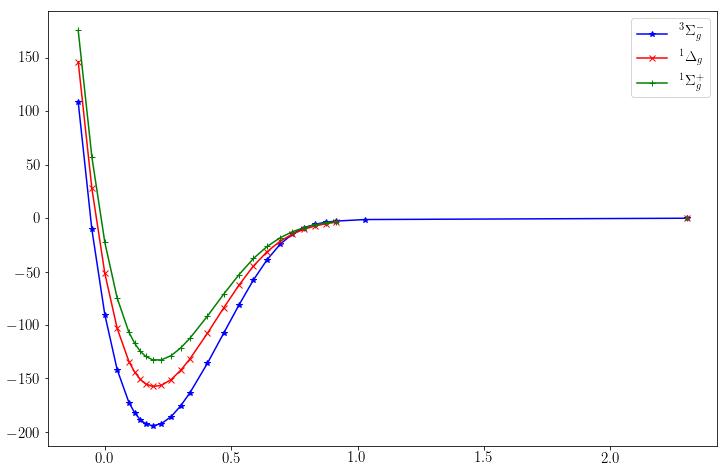

In [636]:
# O2:
# from Bytautas2010:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 15})
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
states = []
for i in range(len(list_data)):
    if (list_data[i]['mol'] == 'O2'):
        idxes.append(i)
        states.append(list_data[i]['state'])
for i, idx in enumerate(idxes):
    ax.plot(np.log(list_data[idx]['R']), list_data[idx]['V'], shapes[i])
ax.legend(states)
print("data lengths:",[len(list_data[i]['R']) for i in idxes])

data lengths: [87, 670]


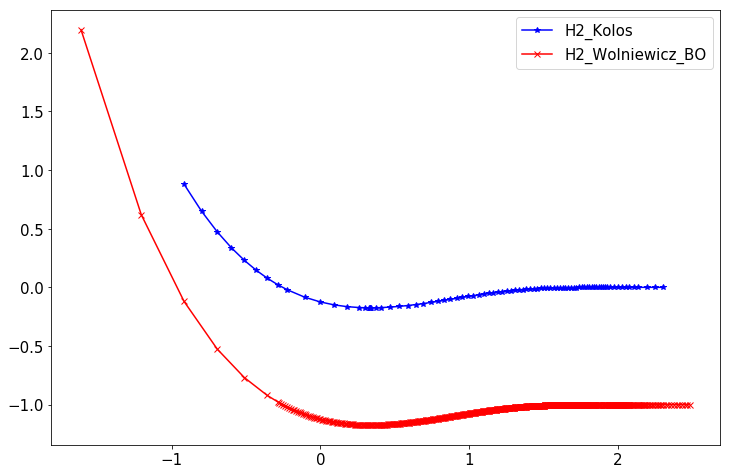

In [637]:
# H2
# Kolos and Wolniewicz
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
auths = []
for i in range(len(list_data)):
    if (list_data[i]['mol'] == 'H2'):
        idxes.append(i)
        auths.append(list_data[i]['author'])
for i, idx in enumerate(idxes):
    ax.plot(np.log(list_data[idx]['R']), list_data[idx]['V'], shapes[i])
ax.legend(auths)
print("data lengths:",[len(list_data[i]['R']) for i in idxes])

In [638]:
state_set = []
for dat in list_data:
    state_set.append(dat["state"])
state_set = set(state_set)

[ 5.  6.  8. 10. 15. 20.] [-75.47753  -75.475676 -75.475545 -75.475452 -75.47543  -75.475432]


Text(0.5,1,'1/R**4')

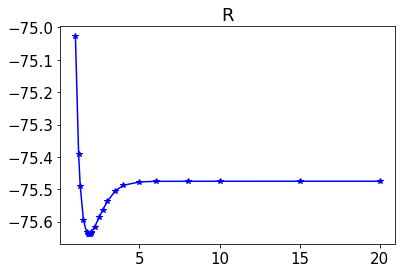

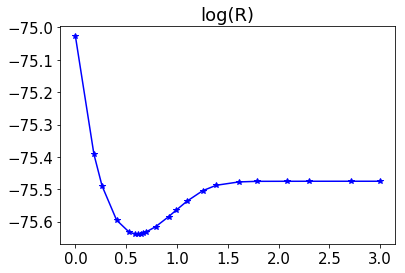

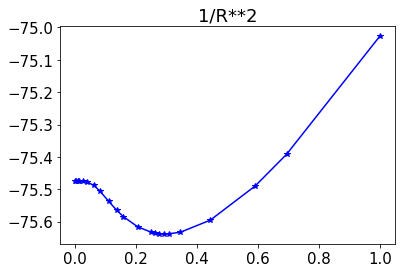

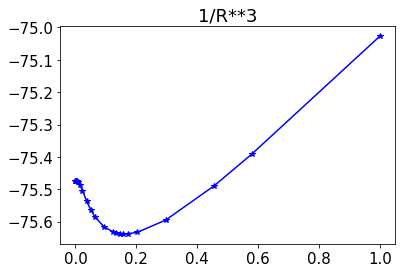

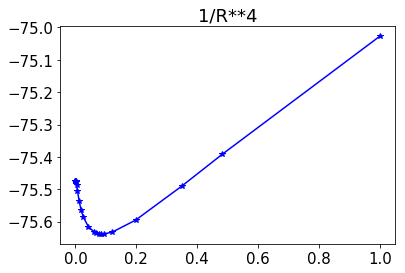

In [639]:
# test shift data of Chu et al
data_shift = []
for dat in list_data:
    if dat['author'] == 'Chu et al 1974':
        data_shift.append(dat)


import matplotlib.pyplot as plt
idx = 1
#fig, ax = plt.subplots(figsize=(10, 5))
#ax.plot(data_shift[idx]['R'], data_shift[idx]['V'])
# test shift on one data:
size = len(data_shift[idx]['R'])
R = data_shift[idx]['R'][size-6:size]
V = data_shift[idx]['V'][size-6:size]
print(R, V)
plt.plot(data_shift[idx]['R'], data_shift[idx]['V'], 'b-*')
plt.title("R")
plt.figure()
plt.plot(np.log(data_shift[idx]['R']), data_shift[idx]['V'], 'b-*')
plt.title("log(R)")
plt.figure()
plt.plot(1/data_shift[idx]['R']**2, data_shift[idx]['V'], 'b-*')
plt.title("1/R**2")
plt.figure()
plt.plot(1/data_shift[idx]['R']**3, data_shift[idx]['V'], 'b-*')
plt.title("1/R**3")
plt.figure()
plt.plot(1/data_shift[idx]['R']**4, data_shift[idx]['V'], 'b-*')
plt.title("1/R**4")

# answer: shift the energy by the last value of the point, since the energy value is already linear

data lengths: [22, 22, 22, 22]


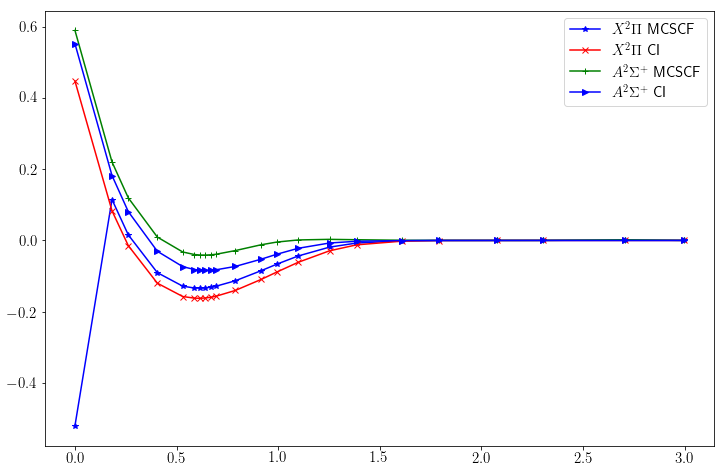

In [640]:
# shift data by criterion
# chu et al: all data shifted by the last index's energy
for dat in list_data:
    if dat['author'] == 'Chu et al 1974':
        dat['V'] -= dat['V'][-1]

# test plot:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
states = []
for i in range(len(list_data)):
    if (list_data[i]['author'] == 'Chu et al 1974') and (list_data[i]['mol'] == 'OH'):
        idxes.append(i)
        states.append(list_data[i]['state'])
for i, idx in enumerate(idxes):
    ax.plot(np.log(list_data[idx]['R']), list_data[idx]['V'], shapes[i])
ax.legend(states)
print("data lengths:",[len(list_data[i]['R']) for i in idxes])

### Shift and re-arrange data

In [641]:
#the shapes of plots:
shapes = ['b-o','r-x','g-^', 'b-*', 'r-D', 'b-<', 'g-X']

Text(0,0.5,'V')

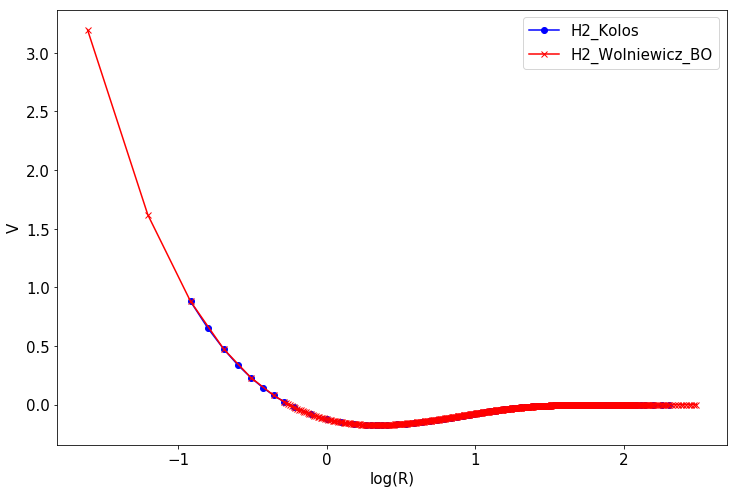

In [642]:
#H2 (shift Wolniewicz_BO):
idxes = []
legends = []
for i, data in enumerate(list_data):
    if data['mol']=='H2':
        if data['author'] == 'H2_Wolniewicz_BO':
            data['V'] -= data['V'][-1]
        idxes.append(i)
        legends.append(data['author'])
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = False
fig, ax = plt.subplots(figsize=(12, 8))
for i, idx in enumerate(idxes):
    ax.plot(np.log(list_data[idx]['R']), list_data[idx]['V'], shapes[i])
ax.legend(legends)
plt.xlabel('log(R)')
plt.ylabel('V')

Text(0,0.5,'V')

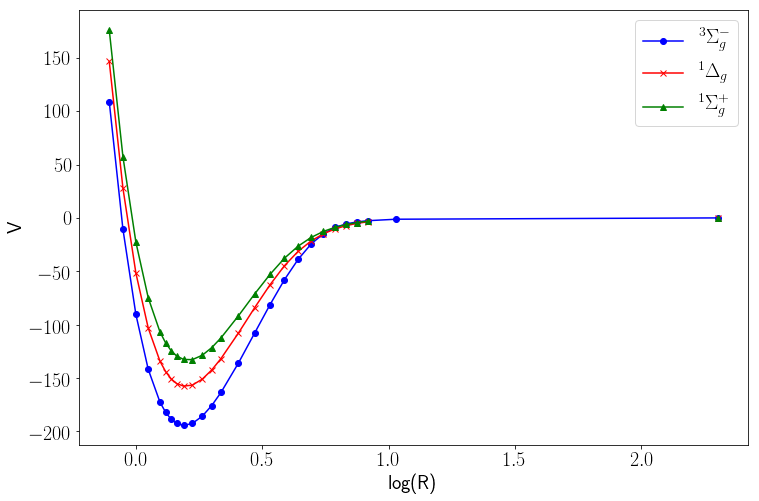

In [643]:
#O2 
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 20})
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
legends = []
for i in range(len(list_data)):
    if (list_data[i]['mol'] == 'O2'):
        idxes.append(i)
        legends.append(list_data[i]['state'])
for i, idx in enumerate(idxes):
    ax.plot(np.log(list_data[idx]['R']), list_data[idx]['V'], shapes[i])
ax.legend(legends)
plt.xlabel('log(R)')
plt.ylabel('V')

Cooper_et_al(1984)
vanDishoeck_and_Dalgarno(1983)
vanDishoeck_et_al(1983)
Nemukhin_and_Grigorenko(1997)
Hodges(1993)
Pradhan(1995)


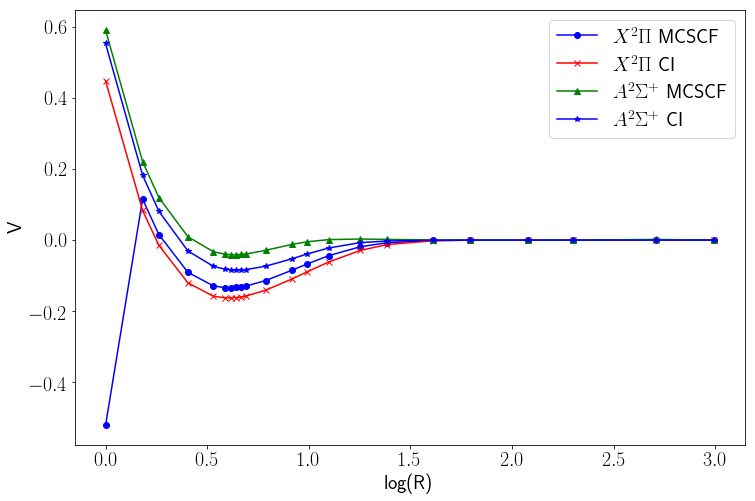

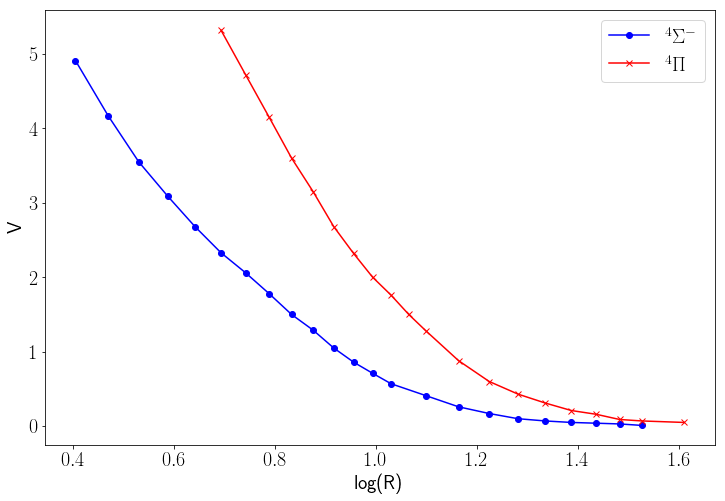

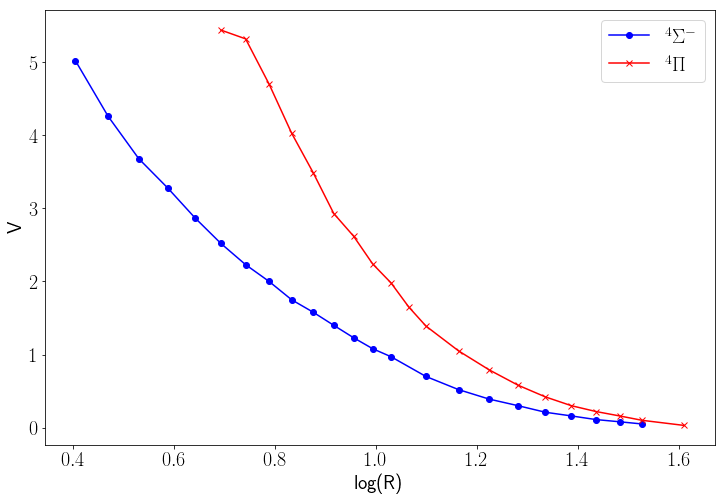

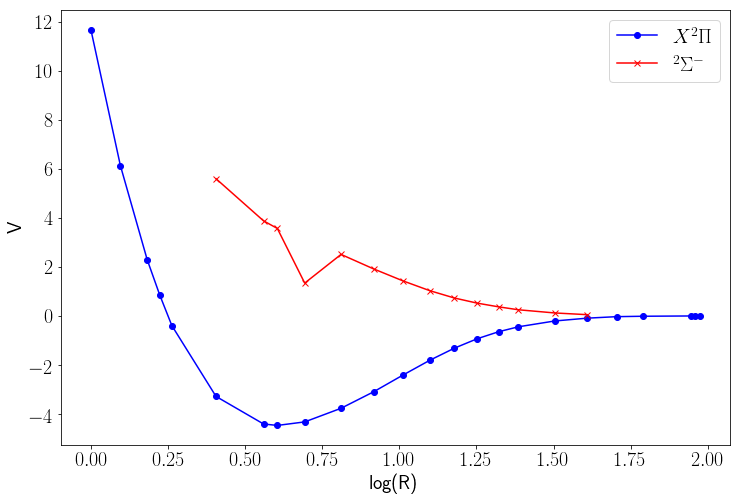

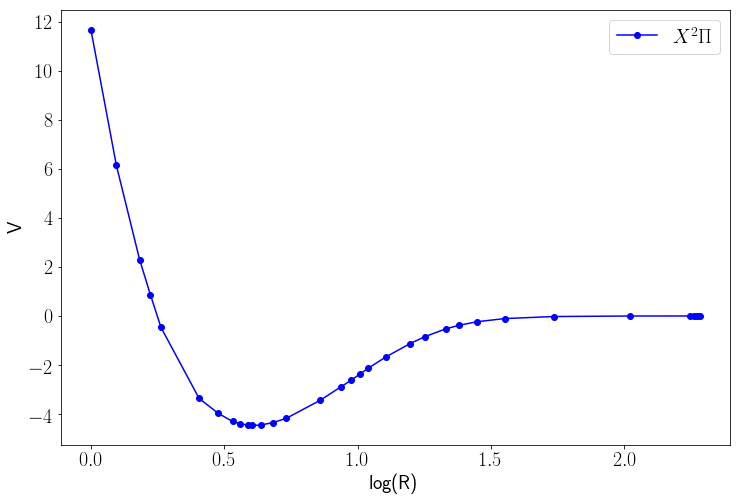

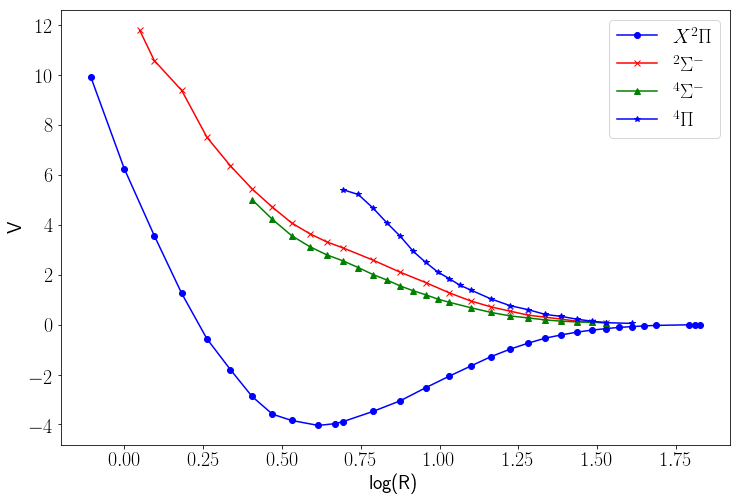

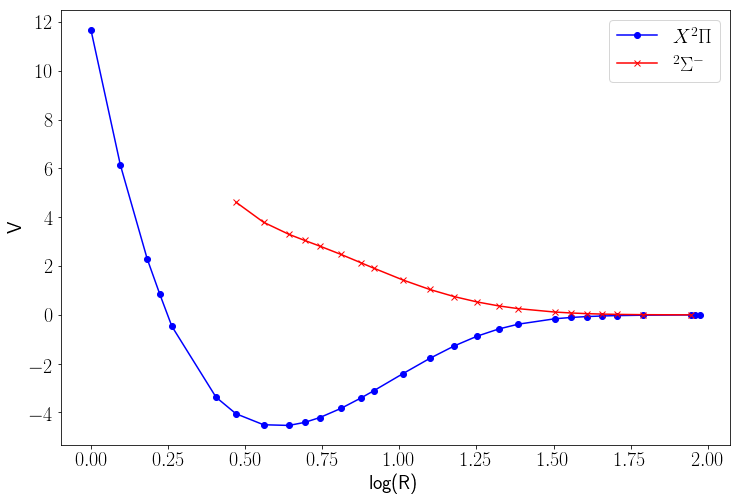

In [644]:
#OH (shift chu et al and re-arrange based on state)
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 20})
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
legends = []
for i in range(len(list_data)):
    if (list_data[i]['mol'] == 'OH') and (list_data[i]['author'] == 'Chu et al 1974'):
        list_data[i]['V'] -= list_data[i]['V'][-1]
        idxes.append(i)
        legends.append(list_data[i]['state'])
for i, idx in enumerate(idxes):
    ax.plot(np.log(list_data[idx]['R']), list_data[idx]['V'], shapes[i])
ax.legend(legends)
plt.xlabel('log(R)')
plt.ylabel('V')

#get unique states:
author_set = []
idxes = []
#plot per author containing all states instead of per state:
for i, data in enumerate(list_data):
    if data["mol"] == 'OH' and data["author"] != 'Chu et al 1974':
        author_set.append(data["author"])
        idxes.append(i)
author_set = set(author_set)
#get indexes corresponding to each authors
idxes = []
author_set = list(author_set)
for i, author in enumerate(author_set):
    sub_idxes = []
    for j,data in enumerate(list_data):
        if data['author'] == author:
            sub_idxes.append(j)
    idxes.append(sub_idxes)

#plot per author:
for i in idxes:
    print(list_data[i[0]]['author'])
    import matplotlib
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams.update({'font.size': 20})
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(12, 8))
    shape_idx = 0
    legends = []
    for j in i:
        ax.plot(np.log(list_data[j]['R']), list_data[j]['V'], shapes[shape_idx])
        legends.append(list_data[j]['state'])
        shape_idx += 1
    ax.legend(legends)
    plt.xlabel('log(R)')
    plt.ylabel('V')

In [645]:
#save data
np.save('data/hxoy_data', list_data, allow_pickle=True)
test_data = np.load('data/hxoy_data.npy', allow_pickle=True)
print(test_data[()][1]) #output data using [()]
l_data = test_data[()]
for data in l_data:
    print(len(data['R']), data['author'], data['state'])

{'mol': 'OH', 'state': '$X^2\\Pi$', 'author': 'Nemukhin_and_Grigorenko(1997)', 'R': array([1.  , 1.1 , 1.2 , 1.25, 1.3 , 1.5 , 1.61, 1.7 , 1.75, 1.8 , 1.83,
       1.89, 1.98, 2.08, 2.36, 2.55, 2.65, 2.74, 2.83, 3.02, 3.31, 3.5 ,
       3.78, 3.97, 4.25, 4.72, 5.67, 7.56, 9.45, 9.6 , 9.7 , 9.8 ]), 'V': array([ 1.16670e+01,  6.13800e+00,  2.29300e+00,  8.47230e-01,
       -4.71180e-01, -3.37316e+00, -3.97575e+00, -4.31208e+00,
       -4.40487e+00, -4.46228e+00, -4.47616e+00, -4.46038e+00,
       -4.35807e+00, -4.18637e+00, -3.45358e+00, -2.90719e+00,
       -2.63889e+00, -2.38012e+00, -2.13305e+00, -1.68298e+00,
       -1.13142e+00, -8.47610e-01, -5.35510e-01, -3.90470e-01,
       -2.42720e-01, -1.12380e-01, -2.96600e-02, -8.16000e-03,
       -6.53000e-03, -3.21000e-03, -3.01000e-03, -2.83000e-03])}
29 Pradhan(1995) $X^2\Pi$
32 Nemukhin_and_Grigorenko(1997) $X^2\Pi$
24 vanDishoeck_et_al(1983) $X^2\Pi$
32 Hodges(1993) $X^2\Pi$
21 Pradhan(1995) $^2\Sigma^-$
14 vanDishoeck_et_al(1983) $^2\

### Data Corrections

In [646]:
#Reload data
test_data = np.load('data/hxoy_data.npy', allow_pickle=True)
list_data = test_data[()]

In [647]:
#Correcting state/author labels into tex format:
for i, data in enumerate(list_data):
    data["author"] = data["author"].replace("_"," ")
    print(data["author"])

Pradhan(1995)
Nemukhin and Grigorenko(1997)
vanDishoeck et al(1983)
Hodges(1993)
Pradhan(1995)
vanDishoeck et al(1983)
Hodges(1993)
vanDishoeck and Dalgarno(1983)
Hodges(1993)
Cooper et al(1984)
vanDishoeck and Dalgarno(1983)
Hodges(1993)
Cooper et al(1984)
Chu et al 1974
Chu et al 1974
Chu et al 1974
Chu et al 1974
Bytautas2010
Bytautas2010
Bytautas2010
H2 Kolos
H2 Wolniewicz BO


Text(0,0.5,'$V$')

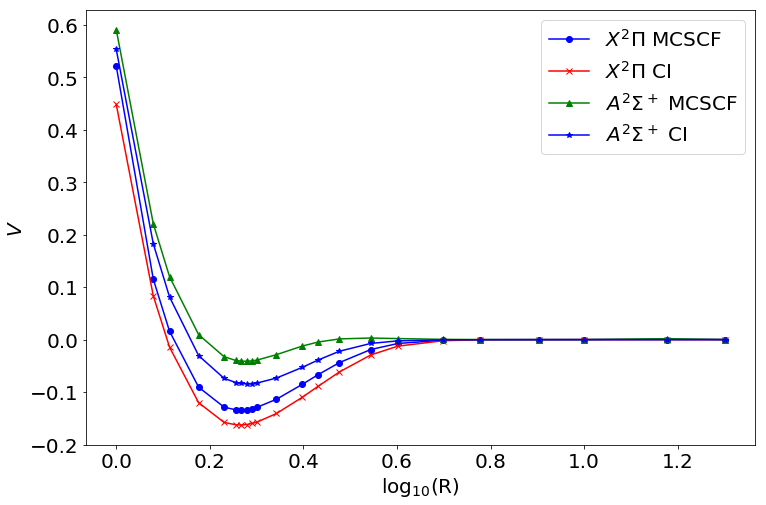

In [648]:
#Correction for Chu et al data of the X2Pi state:
for i, data in enumerate(list_data):
    if (list_data[i]['mol'] == 'OH') and (list_data[i]['author'] == 'Chu et al 1974'):
        if data['state'] == '$X^2\Pi$ MCSCF':
            data['V'][0] = -data['V'][0] # correct the first index energy by flipping the sign
#check the corrected data plot:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams.update({'font.size': 20})
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
legends = []
for i in range(len(list_data)):
    if (list_data[i]['mol'] == 'OH') and (list_data[i]['author'] == 'Chu et al 1974'):
        #list_data[i]['V'] -= list_data[i]['V'][-1]
        idxes.append(i)
        legends.append(list_data[i]['state'])
for i, idx in enumerate(idxes):
    ax.plot(np.log10(list_data[idx]['R']), list_data[idx]['V'], shapes[i])
ax.legend(legends)
plt.xlabel('log$_{10}$(R)')
plt.ylabel('$V$')

10


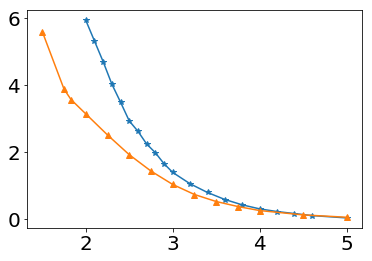

In [649]:
#Correction for OH 4\pi and x2pi of van Dishoeck :
from scipy import interpolate

#4\pi:
idx = None
for i, data in enumerate(list_data):
    if data["author"] == "vanDishoeck and Dalgarno(1983)" and data["mol"] == "OH" and data["state"] == "$^4\Pi$":
        idx = i
        # replace the 1st index v with extrapolation of the next 3 data:
        R = data["R"][1:4]; V = data["V"][1:4]
        f = interpolate.interp1d(R, V, fill_value='extrapolate')
        data["V"][0] = f(data["R"][0])
print(idx)
plt.plot(list_data[idx]["R"], list_data[idx]["V"], "-*")
        
        
#x2pi:
idx = None
for i, data in enumerate(list_data):
    if data["author"] == "vanDishoeck et al(1983)" and data["mol"] == "OH" and data["state"] == "$^2\Sigma^-$":
        idx = i
        # replace the 4th index v with extrapolation of index (2,3,5,6) data:
        interpol_idx = [1,2,4,5]
        R = data["R"][interpol_idx]; V = data["V"][interpol_idx]
        f = interpolate.interp1d(R, V, fill_value='extrapolate')
        data["V"][3] = f(data["R"][3])
        
plt.plot(list_data[idx]["R"], list_data[idx]["V"], "-^")

In [650]:
#save corrected data:
np.save('data/hxoy_data_corr', list_data, allow_pickle=True)

#### Data addition - 080921

In [651]:
# OH and its ions from Werner et al(1983):
#reload
list_data = np.load('data/hxoy_data_corr.npy', allow_pickle=True)
list_data = list_data[()]
#data op:
f_dir = "/users/baribowo/Code/Python/pes/data/" # office dir
fname = 'OH_and_ions_Werner1983_multi_states_hartree'
temp = {}
R = []
Vs = []
with open(f_dir+fname) as f:
    lines = [line.rstrip() for line in f]
    states = lines[0].split("#")[1:4]
    mols = [state.split()[1] for state in states]
    states = [state.split()[0] for state in states]
    methods = lines[1].split()[1:7]
    print(states, mols, methods)
    for i in range(2, len(lines)):
        print(lines[i])
        splits = lines[i].split()
        R.append(splits[0])
        V_sub = []
        for j in range(1, len(splits)):
            if splits[j] == 'None':
                splits[j] = 'NaN'
            V_sub.append(splits[j])
        Vs.append(V_sub)
R = np.array(R, dtype=float)
Vs = np.array(Vs, dtype=float).T
author = "Werner et al(1983)"
print(list_data[0].keys())
new_data = []
for i in range(len(states)):
    data = {}
    j=2*i
    data["method"] = methods[j]
    data["author"] = author
    data["state"] = states[i]
    data["mol"] = mols[i]
    nan_len = len(np.argwhere(np.isnan(Vs[j]))) #nan length
    data["R"] = R[:len(R)-nan_len]#exclude nan
    data["V"] = Vs[j][~np.isnan(Vs[j])]
    new_data.append(data)
    data = {}
    data["method"] = methods[j+1]; 
    data["author"] = author
    data["state"] = states[i]
    data["mol"] = mols[i]
    nan_len = len(np.argwhere(np.isnan(Vs[j+1]))) #nan length
    data["R"] = R[:len(R)-nan_len]#exclude nan
    data["V"] = Vs[j+1][~np.isnan(Vs[j+1])]
    new_data.append(data)
new_data = np.array(new_data)
list_data = np.hstack([list_data, new_data]) #extend the newly added data
np.save('data/hxoy_data_corr', list_data, allow_pickle=True) #savedata

['$X^2\\Pi$', '$X^1\\Sigma^+', '$X^3\\Sigma^-$'] ['OH', 'OH-', 'OH+'] ['MCSCF(7)-SCEP', 'SCEP-CEPA', 'MCSCF(5)-SCEP', 'SCEP-CEPA', 'MCSCF(7)-SCEP', 'SCEP-CEPA']
1.2 -0.395588 -0.396586 -0.460736 -0.459319 -0.889472 -0.886798
1.4 -0.560605 -0.561620 -0.623203 -0.621689 -1.065439 -1.062682
1.5 -0.602655 -0.603573 -0.664055 -0.662432 -1.112729 -1.109924
1.6 -0.628030 -0.628839 -0.688217 -0.686613 -1.143223 -1.140366
1.7 -0.641644 -0.642332 -0.700895 -0.699173 -1.161816 -1.158904
1.8 -0.646971 -0.647542 -0.705468 -0.703642 -1.171978 -1.169006
1.9 -0.646503 -0.646966 -0.704438 -0.702541 -1.176181 -1.173147
2.0 -0.642058 -0.642401 -0.699593 -0.697689 -1.176209 -1.173104
2.2 -0.626038 -0.626159 -0.683340 -0.681632 -1.168499 -1.165244
2.5 -0.594944 -0.594751 -0.653051 -0.652223 -1.147992 -1.144464
3.0 -0.546216 -0.545391 -0.606786 None -1.110563 -1.106447
3.5 -0.512845 -0.510681 -0.573559 None -1.078861 -1.073987
4.0 -0.495009 None -0.551977 None None None
5.0 -0.483690 None -0.531153 None Non

{'mol': 'OH', 'state': '$X^2\\Pi$', 'author': 'Pradhan(1995)', 'R': array([1.  , 1.1 , 1.2 , 1.25, 1.3 , 1.5 , 1.6 , 1.75, 1.9 , 2.  , 2.1 ,
       2.25, 2.4 , 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.5 , 4.75,
       5.  , 5.25, 5.5 , 6.  , 7.  , 7.1 , 7.2 ]), 'V': array([ 1.16670e+01,  6.13800e+00,  2.29300e+00,  8.47230e-01,
       -4.71180e-01, -3.37316e+00, -4.05089e+00, -4.50268e+00,
       -4.53042e+00, -4.40562e+00, -4.20861e+00, -3.83143e+00,
       -3.40631e+00, -3.11515e+00, -2.40954e+00, -1.78479e+00,
       -1.26939e+00, -8.70850e-01, -5.80780e-01, -3.80620e-01,
       -1.61350e-01, -1.05660e-01, -6.97000e-02, -4.63200e-02,
       -3.09900e-02, -1.40500e-02, -2.71000e-03, -1.96000e-03,
       -1.79000e-03])}


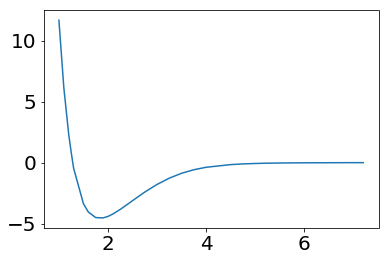

In [652]:
print(list_data[0])
plt.plot(list_data[0]['R'], list_data[0]['V'])

In [707]:
# H2+ from Sharp(1971):
#reload
list_data = np.load('data/hxoy_data_corr.npy', allow_pickle=True)
list_data = list_data[()]
#data op:
f_dir = "/users/baribowo/Code/Python/pes/data/"
fname = 'H2plus_Sharp(1971)_multistates'
R = []
V = []
#only get the numerical value:
arrays = []
headers = []
with open(f_dir+fname) as f:
    lines = [line.rstrip() for line in f]
    for i, line in enumerate(lines):
        if line[0] != '#':
            splits = line.split()
            arrays.append(np.array(splits, dtype=float))
        else:
            headers.append(line)
#look for break indexes:
idxes = [0]
for i, arr in enumerate(arrays):
    if i > 0:
        if len(arrays[i]) != len(arrays[i-1]):
            idxes.append(i)
list_array = []
for i in range(len(idxes)):
    if i == len(idxes)-1:
        list_array.append(np.array(arrays[idxes[i]:]).T)
    else:
        list_array.append(np.array(arrays[idxes[i]:idxes[i+1]]).T)
print(headers)

new_data = []
#manual append:
author = 'Sharp(1971)'
mol = 'H2+'
#data 0:
data = {
        'mol':mol, 'author':author, 'state':'$X^2\Sigma_g^+ 1s \sigma_g$',
        'R_unit':'angstrom', 'V_unit':'ev', 'method':'united atom'
}
data["R"] = list_array[0][0]; data["V"] = list_array[0][1];
new_data.append(data)
#data 1:
data = {
        'mol':mol, 'author':author, 'state':'$\sigma_g 1s$',
        'R_unit':'bohr', 'V_unit':'hartree', 'method':'separated atom'
}
data["R"] = list_array[0][3]; data["V"] = list_array[0][4];
new_data.append(data)
#data 2:
data = {
        'mol':mol, 'author':author, 'state':'$2p \sigma_u$',
        'R_unit':'angstrom', 'V_unit':'ev', 'method':'united atom'
}
data["R"] = list_array[1][0]; data["V"] = list_array[1][1];
new_data.append(data)
#data 3:
data = {
        'mol':mol, 'author':author, 'state':'$\sigma_u 1s$',
        'R_unit':'bohr', 'V_unit':'hartree', 'method':'separated atom'
}
data["R"] = list_array[2][0]; data["V"] = list_array[2][1];
new_data.append(data)
new_data = np.array(new_data)
list_data = np.hstack([list_data, new_data]) #extend the newly added data
np.save('data/hxoy_data_corr', list_data, allow_pickle=True) #savedata

['#$X^2\\Sigma_g^+ 1s \\sigma_g$ #angstrom #ev #cm_1 #$\\sigma_g 1s$ #bohr #hartree', '#$2p \\sigma_u$ #angstrom #ev #cm_1', '#$\\sigma_u 1s$ #bohr #hartree']


### Re-normalize data:

H2+ $\sigma_g 1s$
{'$X^2\\Pi$', '$A^2\\Sigma^+$ CI', '$X^3\\Sigma^-$', '$X^2\\Pi$ MCSCF', '$^4\\Sigma^-$', '$X^2\\Pi$ CI', '$^2\\Sigma^-$', '$X^2\\Sigma_g^+ 1s \\sigma_g$', 'ground', '$^4\\Pi$', '$\\sigma_u 1s$', '$X^1\\Sigma^+', '$A^2\\Sigma^+$ MCSCF', '$2p \\sigma_u$', '$^1\\Delta_g$', '$^1\\Sigma_g^+$', '$\\sigma_g 1s$', '$^3\\Sigma_g^-$'} {'H2', 'O2', 'OH-', 'H2+', 'OH', 'OH+'}
OH $X^2\Pi$ Pradhan(1995)
OH $X^2\Pi$ Nemukhin and Grigorenko(1997)
OH $X^2\Pi$ vanDishoeck et al(1983)
OH $X^2\Pi$ Hodges(1993)
OH $^2\Sigma^-$ Pradhan(1995)
OH $^2\Sigma^-$ vanDishoeck et al(1983)
OH $^2\Sigma^-$ Hodges(1993)
OH $^4\Sigma^-$ vanDishoeck and Dalgarno(1983)
OH $^4\Sigma^-$ Hodges(1993)
OH $^4\Sigma^-$ Cooper et al(1984)
OH $^4\Pi$ vanDishoeck and Dalgarno(1983)
OH $^4\Pi$ Hodges(1993)
OH $^4\Pi$ Cooper et al(1984)
OH $X^2\Pi$ MCSCF Chu et al 1974
OH $X^2\Pi$ CI Chu et al 1974
OH $A^2\Sigma^+$ MCSCF Chu et al 1974
OH $A^2\Sigma^+$ CI Chu et al 1974
O2 $^3\Sigma_g^-$ Bytautas2010
O2 $^1\Delta_

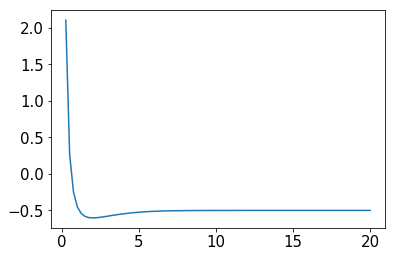

In [845]:
#Reload data:
list_data = np.load('data/hxoy_data_corr.npy', allow_pickle=True)
list_data = list_data[()]

idx = -3
print(list_data[idx]["mol"], list_data[idx]["state"])
plt.plot(list_data[idx]["R"], list_data[idx]["V"])
u_states = set([data["state"] for data in list_data])
u_mol = set([data["mol"] for data in list_data])
print(u_states, u_mol)
#append units manually to those who dont have:
for data in list_data:
    if not "R_unit" in data:
        print(data['mol'], data['state'], data['author'])

### Replot (while {converting, shifting, correcting} the data along the way)

[dict_keys(['mol', 'author', 'state', 'R', 'V']), dict_keys(['mol', 'author', 'state', 'R', 'V'])]
['ground'] ['H2 Kolos', 'H2 Wolniewicz BO']


Text(0,0.5,'$V$')

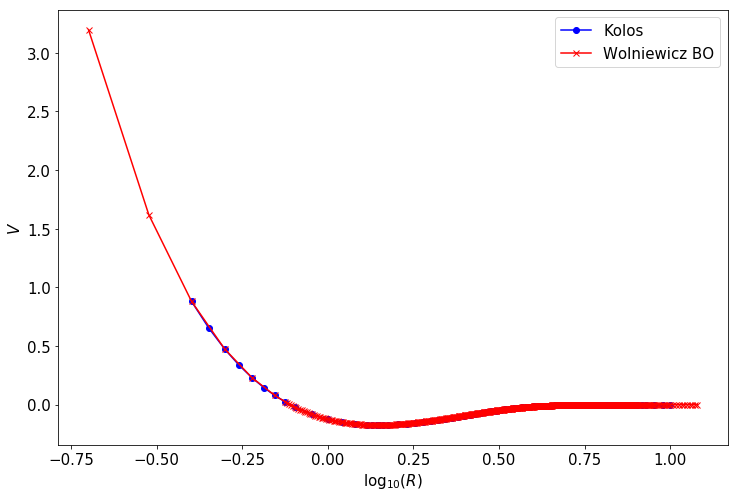

In [857]:
#H2:
q_data = query_one_var("H2", "mol", list_data)
q_idxes = query_one_var_indices("H2", "mol", list_data) #more convenient for storing
print([data.keys() for data in q_data])

# get unique keys:
u_states = list(set([data["state"] for data in q_data]))
u_authors = list(set([data["author"] for data in q_data]))
print(u_states, u_authors)

# plot per state:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
shape_idx = 0
legends = [] #unique key by observation
for i in q_idxes:
    legends.append(list_data[i]["author"][3:])
    ax.plot(np.log10(list_data[i]['R']), list_data[i]['V'], shapes[shape_idx])
    shape_idx += 1
ax.legend(legends)
plt.xlabel(r'log$_{10}(R)$')
plt.ylabel(r'$V$')

[dict_keys(['mol', 'author', 'state', 'R_unit', 'V_unit', 'method', 'R', 'V']), dict_keys(['mol', 'author', 'state', 'R_unit', 'V_unit', 'method', 'R', 'V']), dict_keys(['mol', 'author', 'state', 'R_unit', 'V_unit', 'method', 'R', 'V']), dict_keys(['mol', 'author', 'state', 'R_unit', 'V_unit', 'method', 'R', 'V'])]
['$\\sigma_u 1s$', '$\\sigma_g 1s$', '$2p \\sigma_u$', '$X^2\\Sigma_g^+ 1s \\sigma_g$'] ['Sharp(1971)']
[10. 12. 16. 20. inf] [ 1.0e-04 -5.7e-05 -3.5e-05 -1.5e-05  0.0e+00]
-4.599999999999049e-05
$\sigma_u 1s$ bohr hartree
$\sigma_g 1s$ bohr hartree
$2p \sigma_u$ bohr hartree
$X^2\Sigma_g^+ 1s \sigma_g$ bohr hartree


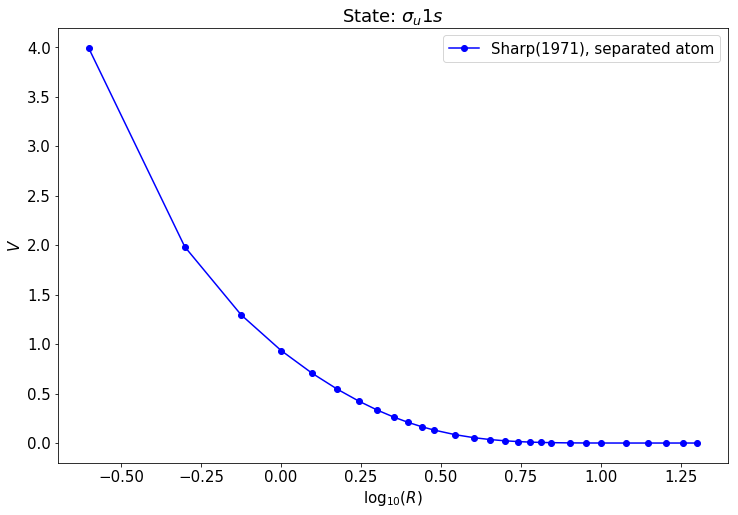

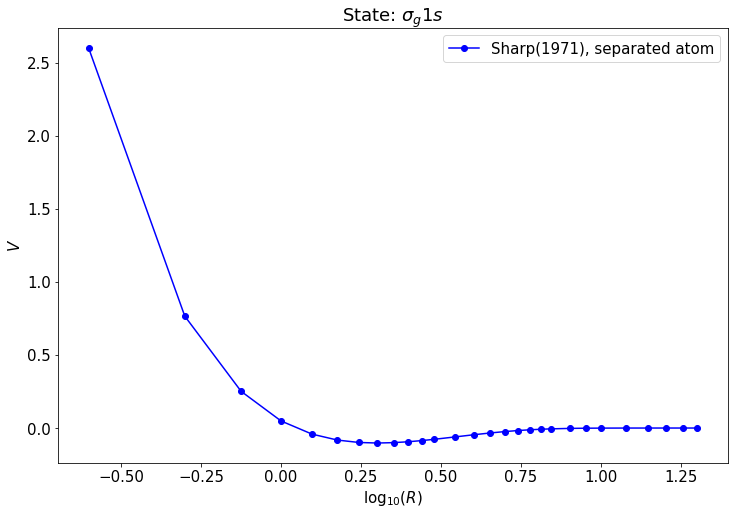

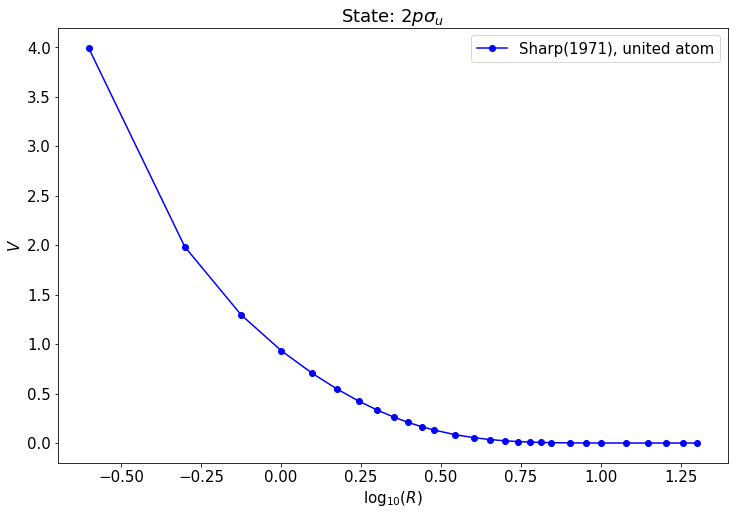

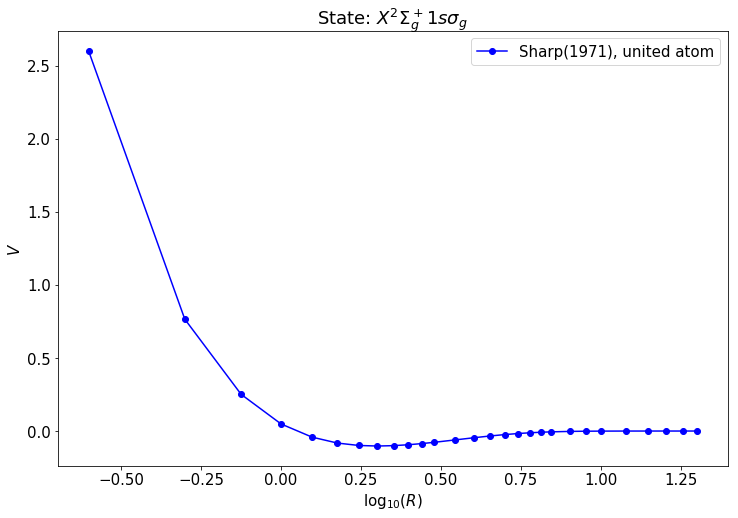

In [884]:
# H2+:
q_data = query_one_var("H2+", "mol", list_data)
q_idxes = query_one_var_indices("H2+", "mol", list_data)
print([data.keys() for data in q_data])
#get unique keys:
u_states = list(set([data["state"] for data in q_data]))
u_authors = list(set([data["author"] for data in q_data]))
print(u_states, u_authors)

# Data conversion, shift, and correction:
# convert all to bohr and hartree:
for i in q_idxes:
    if list_data[i]["R_unit"] == "angstrom":
        list_data[i]["R"], _ = data_conversion(list_data[i]["R"], 0)
        list_data[i]["R_unit"] = "bohr"
        print("converted")
    if list_data[i]["V_unit"] == "ev":
        _, list_data[i]["V"] = data_conversion(0, list_data[i]["V"])
        list_data[i]["V_unit"] = "hartree"

# correct data:
# correct \sigma_u1s -5 index using data indexes:[-7,-6,-4,-2,-1] for linear interpolation:
for i in q_idxes:
    if list_data[i]['state'] == '$\\sigma_u 1s$':
        interpol_idx = [-7,-6,-4,-2,-1]
        corr_idx = -5
        R = list_data[i]["R"][interpol_idx]; V = list_data[i]["V"][interpol_idx]
        print(R, V)
        list_data[i]["V"][corr_idx] = np.interp(list_data[i]["R"][corr_idx],R, V)
        print(list_data[i]["V"][corr_idx])

# shift data to V(inf) = 0:
for i in q_idxes:
    asymp_V = list_data[i]["V"][-1]
    list_data[i]["V"] -= asymp_V
        
# get list of data per state:
data_states = []
for i, state in enumerate(u_states):
    subdata = []
    for j in q_idxes:
        if list_data[j]["state"] == state:
            subdata.append(list_data[j])
    data_states.append(subdata)
# plot data per state:  
for i, data_state in enumerate(data_states):
    # matplotlib parameters:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(12, 8))
    matplotlib.rcParams.update({'font.size': 15})
    shape_idx = 0
    legends = []
    for j, data in enumerate(data_state):
        legend_str = data["author"]
        if "method" in data:
            legend_str+= ", "
            legend_str+=data["method"]
        legends.append(legend_str)
        legends.append(data["state"]+" "+data["method"])
        print(data["state"], data["R_unit"], data["V_unit"])
        ax.plot(np.log10(data['R']), data['V'], shapes[shape_idx])
        shape_idx+=1
    ax.legend(legends)
    plt.title("State: "+data["state"])
    plt.xlabel(r'log$_{10}(R)$')
    plt.ylabel(r'$V$')
            

[dict_keys(['mol', 'author', 'state', 'R', 'V', 'R_unit', 'V_unit']), dict_keys(['mol', 'author', 'state', 'R', 'V', 'R_unit', 'V_unit']), dict_keys(['mol', 'author', 'state', 'R', 'V', 'R_unit', 'V_unit'])]
['$^1\\Sigma_g^+$', '$^3\\Sigma_g^-$', '$^1\\Delta_g$'] ['Bytautas2010']
converted
converted
converted
$^1\Sigma_g^+$ Bytautas2010
$^3\Sigma_g^-$ Bytautas2010
$^1\Delta_g$ Bytautas2010


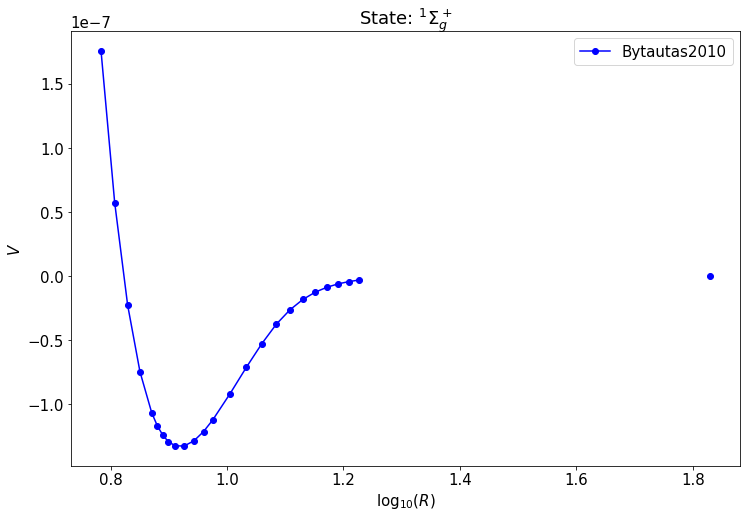

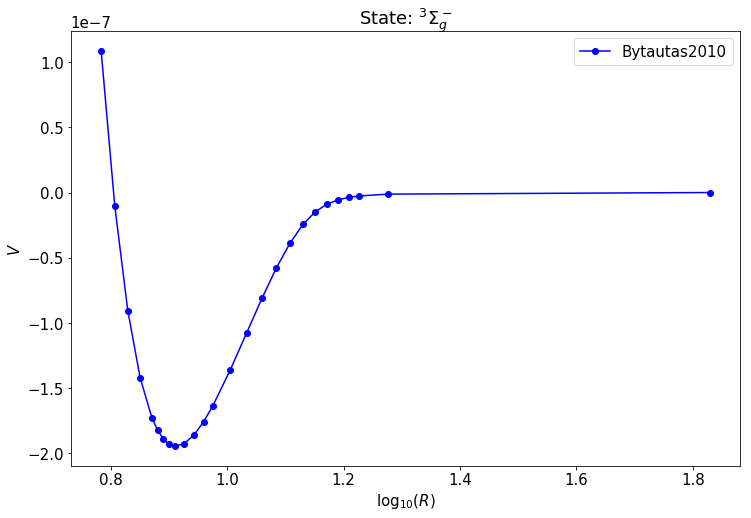

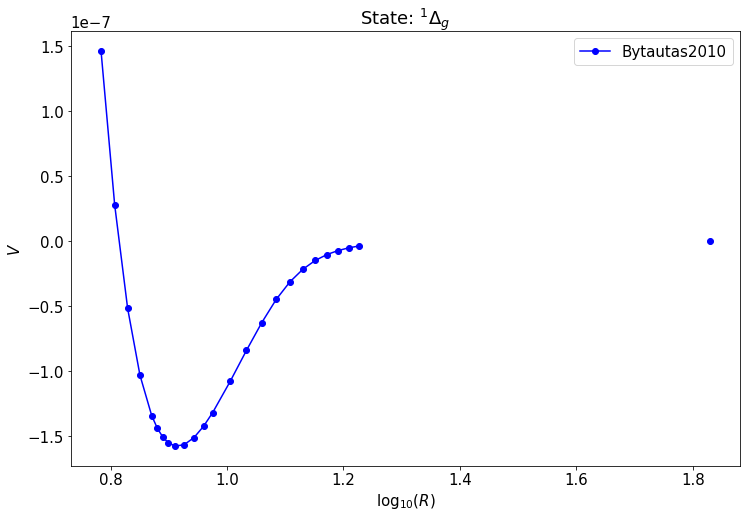

In [881]:
#O2:
mol = "O2"
q_data = query_one_var(mol, "mol", list_data)
q_idxes = query_one_var_indices(mol, "mol", list_data)
print([data.keys() for data in q_data])
#get unique keys:
u_states = list(set([data["state"] for data in q_data]))
u_authors = list(set([data["author"] for data in q_data]))
print(u_states, u_authors)

# Data conversion, shift, and correction:
# convert all to bohr and hartree:
for i in q_idxes:
    #in case of bytautas2010, convert all
    list_data[i]["R"], list_data[i]["V"] = data_conversion(list_data[i]["R"], list_data[i]["V"], V_unit="milihartree")
    list_data[i]["R_unit"] = "bohr"; list_data[i]["V_unit"] = "hartree"
    print("converted")
    
# get list of data per state:
data_states = []
for i, state in enumerate(u_states):
    subdata = []
    for j in q_idxes:
        if list_data[j]["state"] == state:
            subdata.append(list_data[j])
    data_states.append(subdata)
# plot data per state:  
for i, data_state in enumerate(data_states):
    # matplotlib parameters:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(12, 8))
    matplotlib.rcParams.update({'font.size': 15})
    shape_idx = 0
    legends = []
    for j, data in enumerate(data_state):
        legend_str = data["author"]
        if "method" in data:
            legend_str+= ", "
            legend_str+=data["method"]
        legends.append(legend_str)
        print(data["state"], data["author"])
        ax.plot(np.log10(data['R']), data['V'], shapes[shape_idx])
        shape_idx+=1
    ax.legend(legends)
    plt.title("State: "+data["state"])
    plt.xlabel(r'log$_{10}(R)$')
    plt.ylabel(r'$V$')

[dict_keys(['mol', 'state', 'author', 'R', 'V']), dict_keys(['mol', 'state', 'author', 'R', 'V']), dict_keys(['mol', 'state', 'author', 'R', 'V']), dict_keys(['mol', 'state', 'author', 'R', 'V']), dict_keys(['mol', 'state', 'author', 'R', 'V']), dict_keys(['mol', 'state', 'author', 'R', 'V']), dict_keys(['mol', 'state', 'author', 'R', 'V']), dict_keys(['mol', 'state', 'author', 'R', 'V']), dict_keys(['mol', 'state', 'author', 'R', 'V']), dict_keys(['mol', 'state', 'author', 'R', 'V']), dict_keys(['mol', 'state', 'author', 'R', 'V']), dict_keys(['mol', 'state', 'author', 'R', 'V']), dict_keys(['mol', 'state', 'author', 'R', 'V']), dict_keys(['mol', 'author', 'state', 'R', 'V', 'method']), dict_keys(['mol', 'author', 'state', 'R', 'V', 'method']), dict_keys(['mol', 'author', 'state', 'R', 'V', 'method']), dict_keys(['mol', 'author', 'state', 'R', 'V', 'method']), dict_keys(['method', 'author', 'state', 'mol', 'R', 'V']), dict_keys(['method', 'author', 'state', 'mol', 'R', 'V'])] 19
['$X^

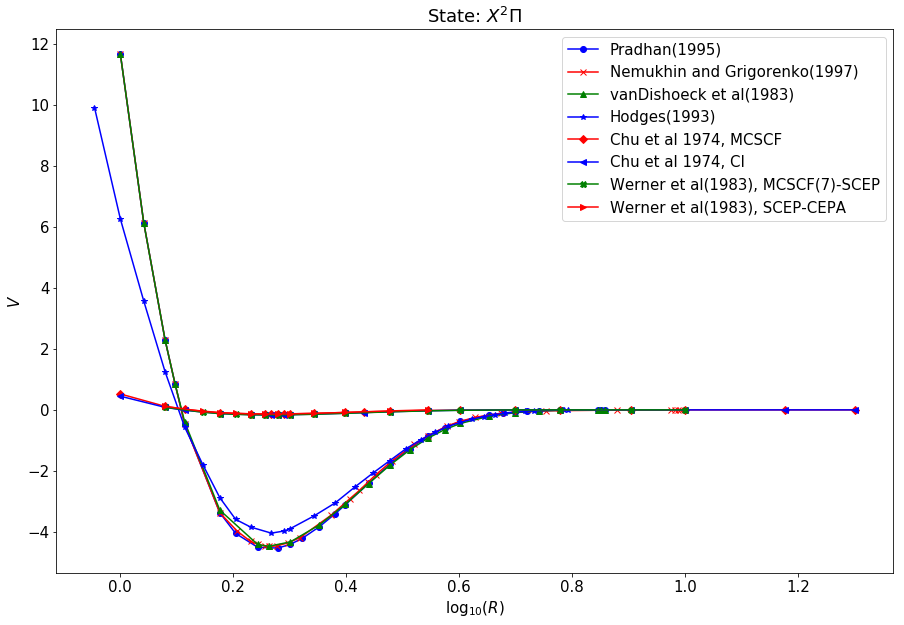

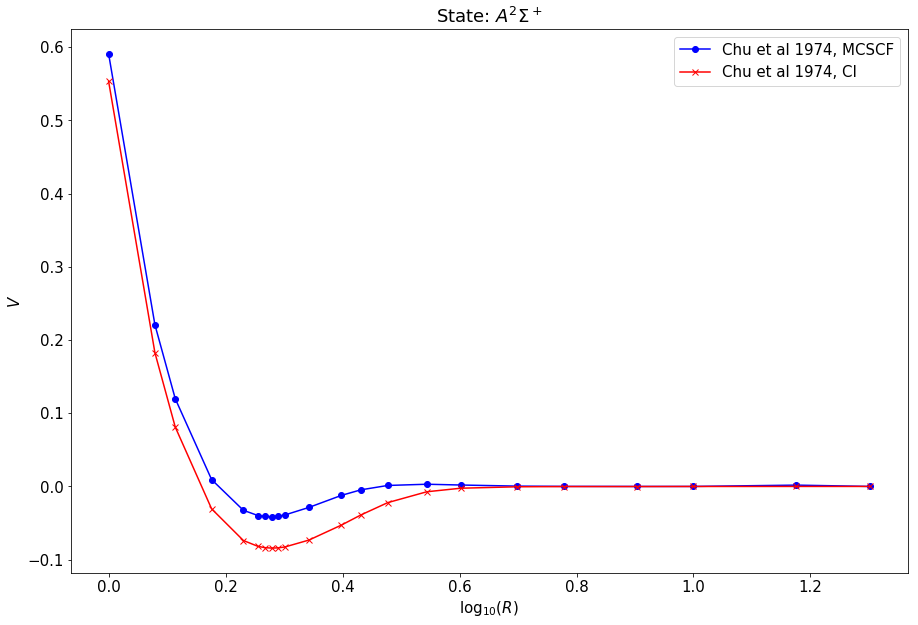

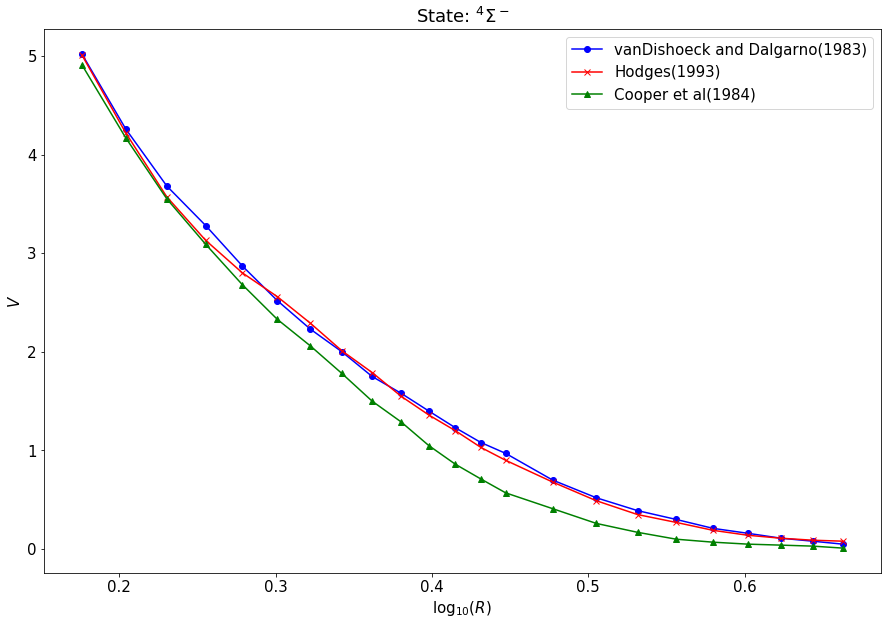

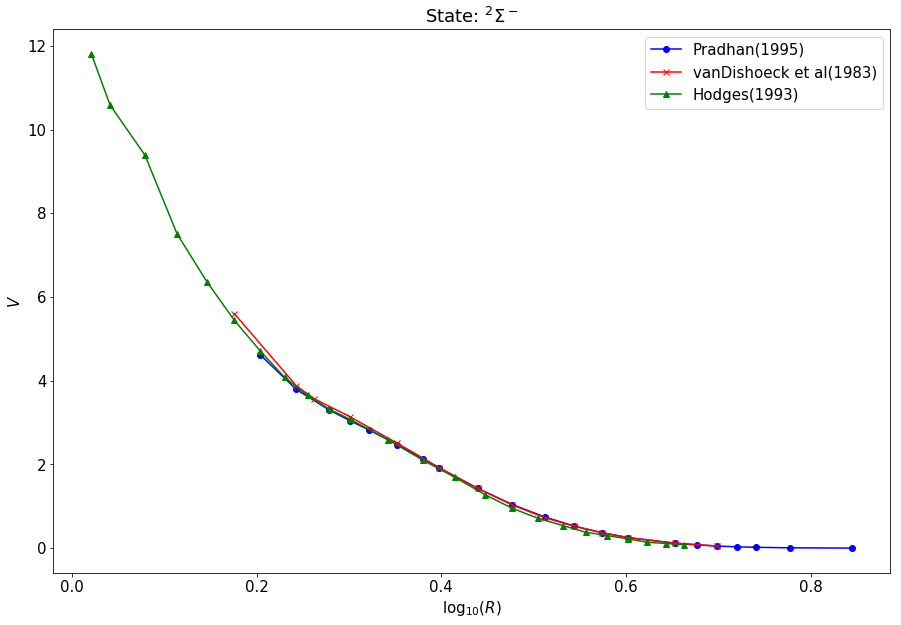

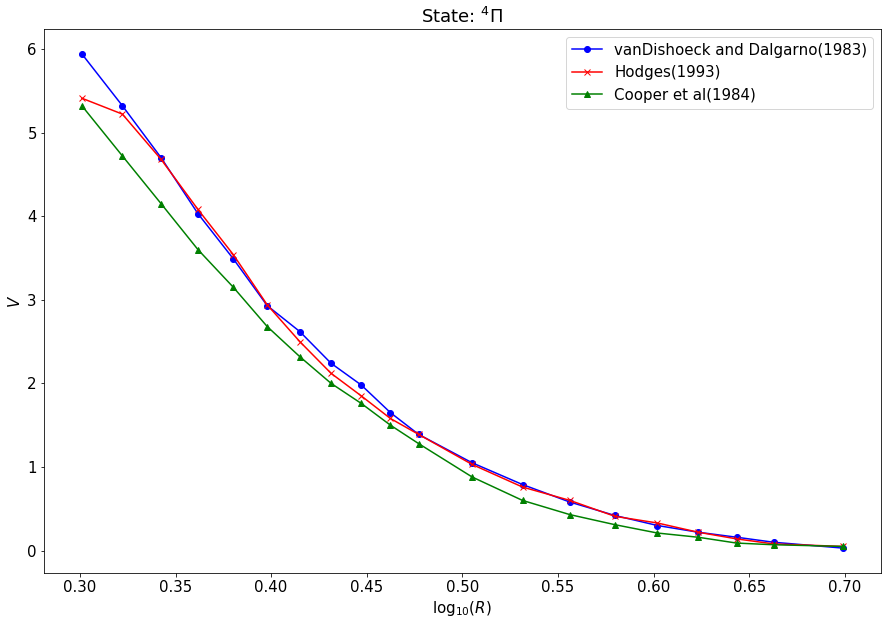

In [883]:
#OH:
mol = "OH"
q_data = query_one_var(mol, "mol", list_data)
q_idxes = query_one_var_indices(mol, "mol", list_data)
print([data.keys() for data in q_data], len(q_data))
#get unique keys:
u_states = list(set([data["state"] for data in q_data]))
u_authors = list(set([data["author"] for data in q_data]))
print(u_states, u_authors)
# renormalize columns of chu et al: ...
# renormalized

# Data conversion, shift, and correction:
# all of them are already in bohr and hartree
# shift werner data:
for i in q_idxes:
    if list_data[i]["author"] == "Werner et al(1983)":
        asymp_V = list_data[i]["V"][-1]
        list_data[i]["V"] -= asymp_V
# all of them are seemingly correct

# get list of data per state:
data_states = []
for i, state in enumerate(u_states):
    subdata = []
    for j in q_idxes:
        if list_data[j]["state"] == state:
            subdata.append(list_data[j])
    data_states.append(subdata)
    
# plot data per state:  
for i, data_state in enumerate(data_states):
    # matplotlib parameters:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(15, 10))
    matplotlib.rcParams.update({'font.size': 15})
    shape_idx = 0
    legends = []
    for j, data in enumerate(data_state):
        legend_str = data["author"]
        if "method" in data:
            legend_str+= ", "
            legend_str+=data["method"]
        legends.append(legend_str)
        print(data["state"], data["author"])
        ax.plot(np.log10(data['R']), data['V'], shapes[shape_idx])
        shape_idx+=1
    ax.legend(legends)
    plt.title("State: "+data["state"])
    plt.xlabel(r'log$_{10}(R)$')
    plt.ylabel(r'$V$')

[dict_keys(['method', 'author', 'state', 'mol', 'R', 'V']), dict_keys(['method', 'author', 'state', 'mol', 'R', 'V'])] 2
['$X^3\\Sigma^-$'] ['Werner et al(1983)']
$X^3\Sigma^-$ Werner et al(1983)
$X^3\Sigma^-$ Werner et al(1983)


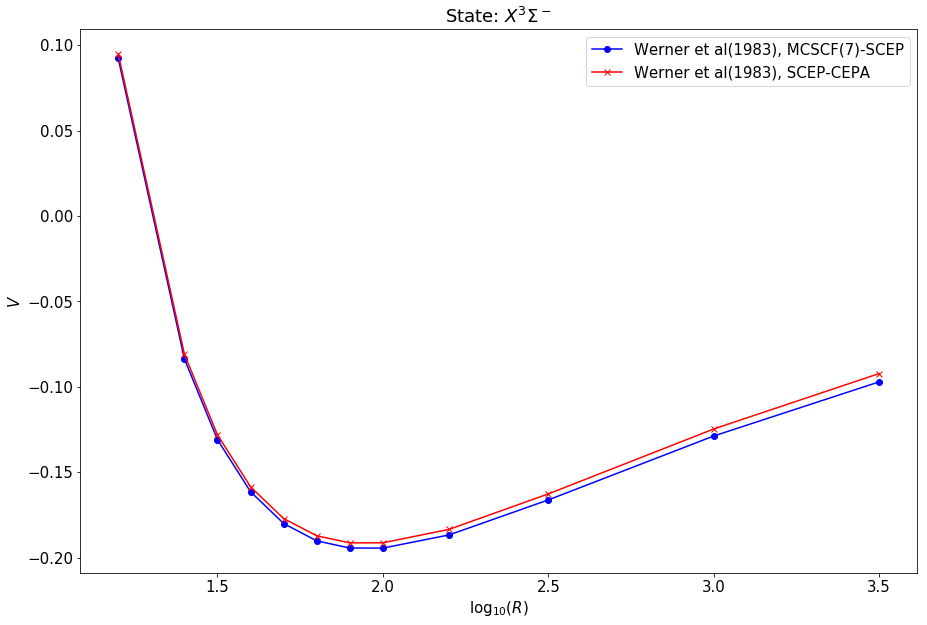

In [898]:
#OH+:
mol = "OH+"
q_data = query_one_var(mol, "mol", list_data)
q_idxes = query_one_var_indices(mol, "mol", list_data)
print([data.keys() for data in q_data], len(q_data))
#get unique keys:
u_states = list(set([data["state"] for data in q_data]))
u_authors = list(set([data["author"] for data in q_data]))
print(u_states, u_authors)

# get list of data per state:
data_states = []
for i, state in enumerate(u_states):
    subdata = []
    for j in q_idxes:
        if list_data[j]["state"] == state:
            subdata.append(list_data[j])
    data_states.append(subdata)

# Data conversion, shift, and correction:
# all of them are already in bohr and hartree
# shift werner data (asymptotic energy is known):
for i in q_idxes:
    if list_data[i]["author"] == "Werner et al(1983)":
        asymp_V = -0.981760
        list_data[i]["V"] -= asymp_V
        list_data[i]["V_asymptote"] = asymp_V #add extra column

# plot data per state:  
for i, data_state in enumerate(data_states):
    # matplotlib parameters:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(15, 10))
    matplotlib.rcParams.update({'font.size': 15})
    shape_idx = 0
    legends = []
    for j, data in enumerate(data_state):
        legend_str = data["author"]
        if "method" in data:
            legend_str+= ", "
            legend_str+=data["method"]
        legends.append(legend_str)
        print(data["state"], data["author"])
        ax.plot(data['R'], data['V'], shapes[shape_idx])
        shape_idx+=1
    ax.legend(legends)
    plt.title("State: "+data["state"])
    plt.xlabel(r'log$_{10}(R)$')
    plt.ylabel(r'$V$')

[dict_keys(['method', 'author', 'state', 'mol', 'R', 'V', 'V_asymptote']), dict_keys(['method', 'author', 'state', 'mol', 'R', 'V', 'V_asymptote'])] 2
['$X^1\\Sigma^+$'] ['Werner et al(1983)']
$X^1\Sigma^+$ Werner et al(1983)
$X^1\Sigma^+$ Werner et al(1983)


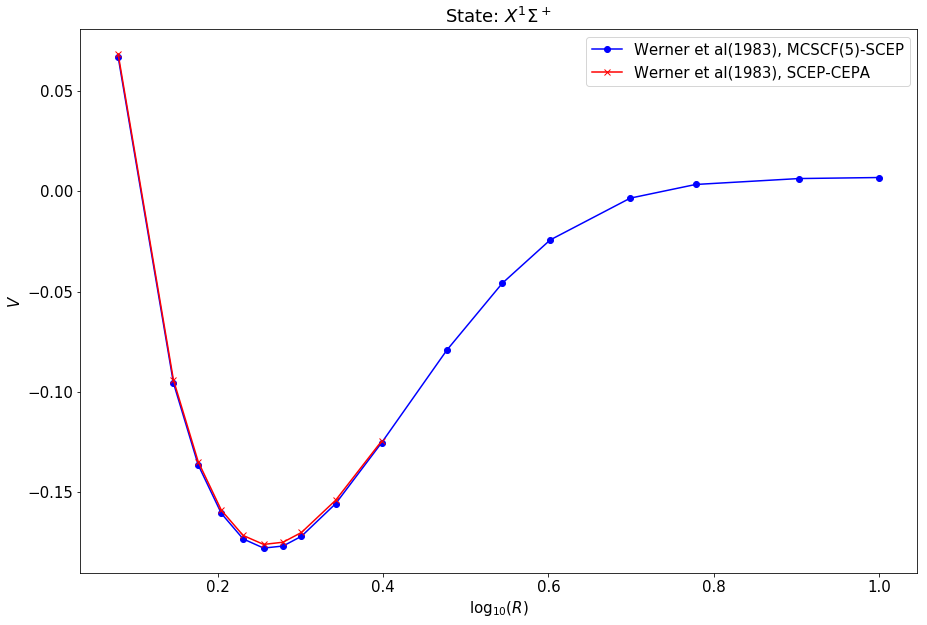

In [907]:
#OH-:
mol = "OH-"
q_data = query_one_var(mol, "mol", list_data)
q_idxes = query_one_var_indices(mol, "mol", list_data)
print([data.keys() for data in q_data], len(q_data))
#get unique keys:
u_states = list(set([data["state"] for data in q_data]))
u_authors = list(set([data["author"] for data in q_data]))
print(u_states, u_authors)

# get list of data per state:
data_states = []
for i, state in enumerate(u_states):
    subdata = []
    for j in q_idxes:
        if list_data[j]["state"] == state:
            list_data[j]["state"] = '$X^1\Sigma^+$' #fix the state string
            subdata.append(list_data[j])
    data_states.append(subdata)

# Data conversion, shift, and correction:
# all of them are already in bohr and hartree
# shift werner data (asymptotic energy is known):
for i in q_idxes:
    if list_data[i]["author"] == "Werner et al(1983)":
        asymp_V = -0.527715
        list_data[i]["V"] -= asymp_V
        list_data[i]["V_asymptote"] = asymp_V #add extra column    
    

# plot data per state:  
for i, data_state in enumerate(data_states):
    # matplotlib parameters:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(15, 10))
    matplotlib.rcParams.update({'font.size': 15})
    shape_idx = 0
    legends = []
    for j, data in enumerate(data_state):
        legend_str = data["author"]
        if "method" in data:
            legend_str+= ", "
            legend_str+=data["method"]
        legends.append(legend_str)
        print(data["state"], data["author"])
        ax.plot(np.log10(data['R']), data['V'], shapes[shape_idx])
        shape_idx+=1
    ax.legend(legends)
    plt.title("State: "+data["state"])
    plt.xlabel(r'log$_{10}(R)$')
    plt.ylabel(r'$V$')

In [910]:
np.save('data/hxoy_data_corr', list_data, allow_pickle=True) #savedata

In [912]:
#check the data count:
for data in list_data:
    print(data["mol"], data["state"], data["author"], len(data["V"]))

OH $X^2\Pi$ Pradhan(1995) 29
OH $X^2\Pi$ Nemukhin and Grigorenko(1997) 32
OH $X^2\Pi$ vanDishoeck et al(1983) 24
OH $X^2\Pi$ Hodges(1993) 32
OH $^2\Sigma^-$ Pradhan(1995) 21
OH $^2\Sigma^-$ vanDishoeck et al(1983) 14
OH $^2\Sigma^-$ Hodges(1993) 24
OH $^4\Sigma^-$ vanDishoeck and Dalgarno(1983) 23
OH $^4\Sigma^-$ Hodges(1993) 23
OH $^4\Sigma^-$ Cooper et al(1984) 23
OH $^4\Pi$ vanDishoeck and Dalgarno(1983) 20
OH $^4\Pi$ Hodges(1993) 20
OH $^4\Pi$ Cooper et al(1984) 20
OH $X^2\Pi$ Chu et al 1974 22
OH $X^2\Pi$ Chu et al 1974 22
OH $A^2\Sigma^+$ Chu et al 1974 22
OH $A^2\Sigma^+$ Chu et al 1974 22
O2 $^3\Sigma_g^-$ Bytautas2010 26
O2 $^1\Delta_g$ Bytautas2010 26
O2 $^1\Sigma_g^+$ Bytautas2010 26
H2 ground H2 Kolos 87
H2 ground H2 Wolniewicz BO 670
OH $X^2\Pi$ Werner et al(1983) 17
OH $X^2\Pi$ Werner et al(1983) 12
OH- $X^1\Sigma^+$ Werner et al(1983) 17
OH- $X^1\Sigma^+$ Werner et al(1983) 10
OH+ $X^3\Sigma^-$ Werner et al(1983) 12
OH+ $X^3\Sigma^-$ Werner et al(1983) 12
H2+ $X^2\Sigma_

### Data iter - 140921

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Pradhan(1995) OH $X^2\Pi$
Nemukhin and Grigorenko(1997) OH $X^2\Pi$
vanDishoeck et al(1983) OH $X^2\Pi$
Hodges(1993) OH $X^2\Pi$
Pradhan(1995) OH $^2\Sigma^-$
vanDishoeck et al(1983) OH $^2\Sigma^-$
Hodges(1993) OH $^2\Sigma^-$
vanDishoeck and Dalgarno(1983) OH $^4\Sigma^-$
Hodges(1993) OH $^4\Sigma^-$
Cooper et al(1984) OH $^4\Sigma^-$
vanDishoeck and Dalgarno(1983) OH $^4\Pi$
Hodges(1993) OH $^4\Pi$
Cooper et al(1984) OH $^4\Pi$


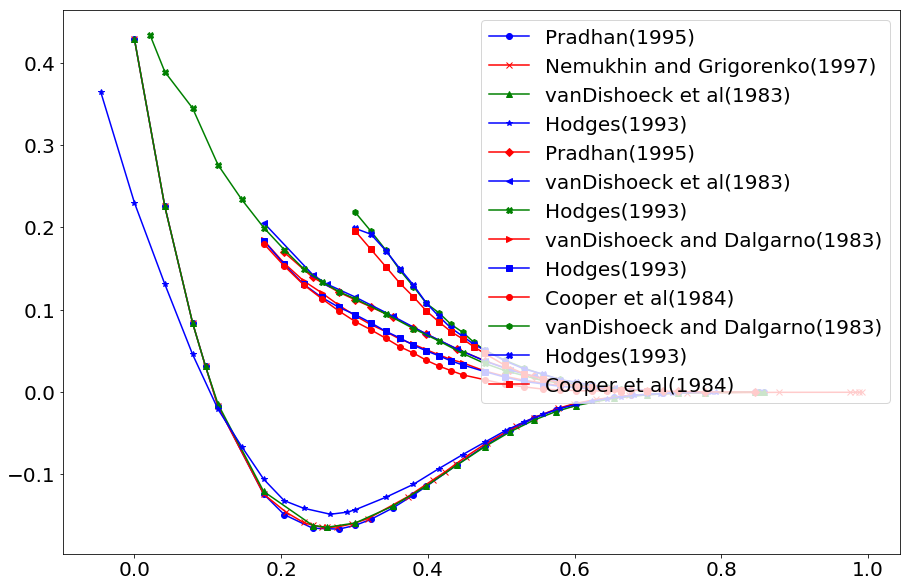

In [1070]:
# Convert all shizgal's data to hartree:

#reload:
list_data = np.load('data/hxoy_data_corr.npy', allow_pickle=True)
list_data = list_data[()]

plt.subplots(figsize=(15, 10))

leg = []
shapeidx = 0
vals = ["Pradhan(1995)", "Nemukhin and Grigorenko(1997)", "vanDishoeck et al(1983)",
        "Hodges(1993)", "vanDishoeck and Dalgarno(1983)", "Cooper et al(1984)"]
dicts = [{"author": val} for val in vals]
qidxes = many_queries_many_vars_indices(dicts, list_data)
print(qidxes)
#enumerate all shizgal's OH data:
for idx in qidxes:
    data = list_data[idx]
    print(list_data[idx]["author"], list_data[idx]["mol"], list_data[idx]["state"])
    leg.append(list_data[idx]["author"])
    #data conversion:
    #_, list_data[idx]["V"] = data_conversion(list_data[idx]["R"], list_data[idx]["V"], R_unit=None, V_unit="ev")
    plt.plot(np.log10(list_data[idx]["R"]), list_data[idx]["V"], shapes[shapeidx])
    shapeidx += 1
plt.legend(leg)

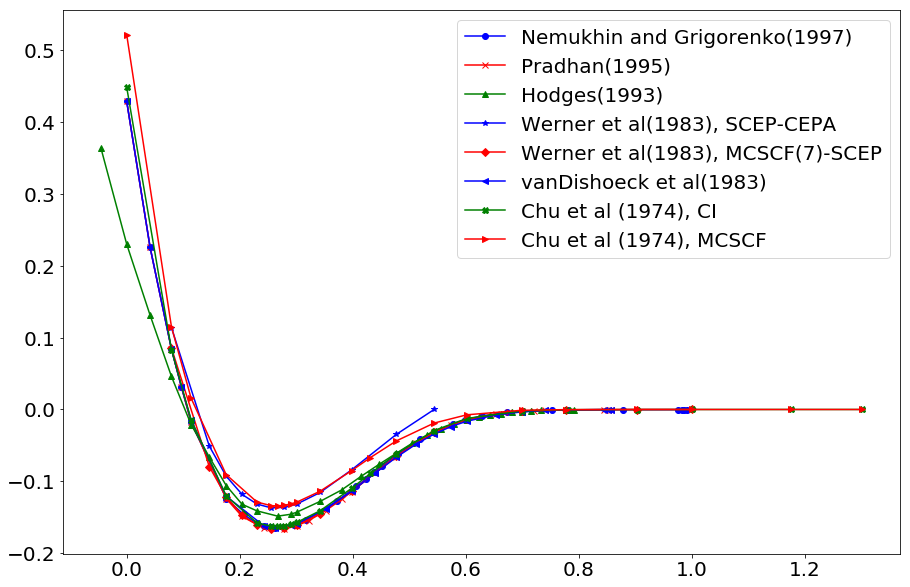

In [1091]:
#replot on the same state (e.g. x2pi):
values = ["OH","$X^2\Pi$"]
keys = ["mol","state"]
qidxes = query_many_vars_indices(values, keys, list_data)
plot_per_state(qidxes, list_data)

In [1076]:
#renormalize authors:
setauth = []
for data in list_data:
    setauth.append(data["author"])
print(set(setauth))
#renormalize Kolos, wolniewicz, bytautas, and chu et al "authors":
qidxes = query_one_var_indices("H2","mol", list_data)
for idx in qidxes:
    if list_data[idx]["author"] == 'H2 Kolos':
        list_data[idx]["author"] = list_data[idx]["author"] + "(1965)"
    elif list_data[idx]["author"] == 'H2 Wolniewicz BO':
        list_data[idx]["author"] = list_data[idx]["author"] + "(1993)"
        
dicts = [{"author":"Bytautas2010"},{"author":'Chu et al 1974'}]
qidxes = many_queries_many_vars_indices(dicts, list_data)
for idx in qidxes:
    st = list_data[idx]["author"]
    newstring = st[:len(st)-4]+"("+st[len(st)-4:len(st)]+")"
    list_data[idx]["author"] = newstring

for idx in qidxes:
    print(list_data[idx]["author"])
    
np.save('data/hxoy_data_corr', list_data, allow_pickle=True) #savedata

{'Werner et al(1983)', 'Chu et al (1974)', 'Bytautas(2010)', 'H2 Kolos(1965)', 'vanDishoeck and Dalgarno(1983)', 'H2 Wolniewicz BO(1993)', 'Sharp(1971)', 'Cooper et al(1984)', 'Nemukhin and Grigorenko(1997)', 'Hodges(1993)', 'vanDishoeck et al(1983)', 'Pradhan(1995)'}


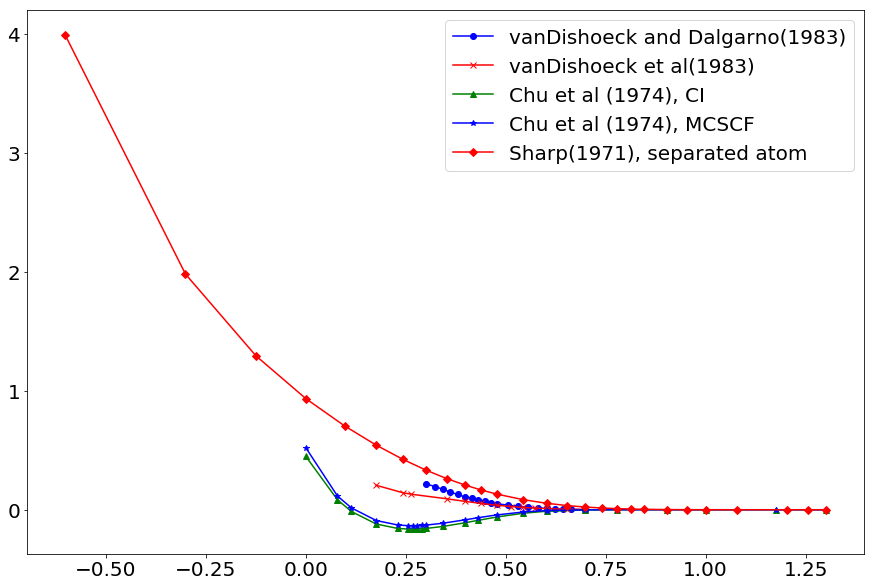

In [1099]:
#Delete outliers:
#reload:
list_data = np.load('data/hxoy_data_corr.npy', allow_pickle=True)
list_data = list_data[()]

#OH ^2\Sigma^- vanDishoeck et al(1983) del(3):
#OH 4\Pi vanDishoeck and Dalgarno(1983) del(0)
#OH Chu et al (1974) X^2\Pi MCSCF del(0)
#H2+ \sigma_u1s -5:
del_idxes = [3, 0, 0, None, -5]
dicts = [{"mol":"OH", "state":"$^2\\Sigma^-$", "author":"vanDishoeck et al(1983)"},
        {"mol":"OH","state":"$^4\Pi$", "author":"vanDishoeck and Dalgarno(1983)"}, 
        {"mol":"OH","state":"$X^2\Pi$" ,"author":"Chu et al (1974)"},
        {"mol":"H2+", "state":"$\sigma_u 1s$"}]
qidxes = many_queries_many_vars_indices(dicts, list_data)
for i, idx in enumerate(qidxes):
    if del_idxes[i]:
        list_data[idx]["R"] = np.delete(list_data[idx]["R"], [del_idxes[i]], axis=0)
        list_data[idx]["V"] = np.delete(list_data[idx]["V"], [del_idxes[i]], axis=0)
plot_per_state(qidxes, list_data, shapes)

[ 6.07349973  6.41091639  6.74833304  7.08574969  7.42316634  7.59187467
  7.76058299  7.92929132  8.14874711  8.4354163   8.77283295  9.1102496
  9.44766625 10.12249956 10.79733286 11.47216616 12.14699947 12.82183277
 13.49666607 14.17149938 14.84633268 15.52116599 16.19599929 16.87083259
 18.8953325  67.48333037] [ 1.46508e-07  2.78980e-08 -5.17280e-08 -1.03146e-07 -1.34261e-07
 -1.44032e-07 -1.50881e-07 -1.55133e-07 -1.57562e-07 -1.56590e-07
 -1.51082e-07 -1.42418e-07 -1.31781e-07 -1.07894e-07 -8.40110e-08
 -6.26240e-08 -4.47530e-08 -3.13050e-08 -2.15920e-08 -1.48480e-08
 -1.02720e-08 -7.18700e-09 -5.09300e-09 -3.66900e-09          nan
  0.00000e+00]
[ 6.07349973  6.41091639  6.74833304  7.08574969  7.42316634  7.59187467
  7.76058299  7.92929132  8.14874711  8.4354163   8.77283295  9.1102496
  9.44766625 10.12249956 10.79733286 11.47216616 12.14699947 12.82183277
 13.49666607 14.17149938 14.84633268 15.52116599 16.19599929 16.87083259
 18.8953325  67.48333037] [ 1.75923e-07  5.7359

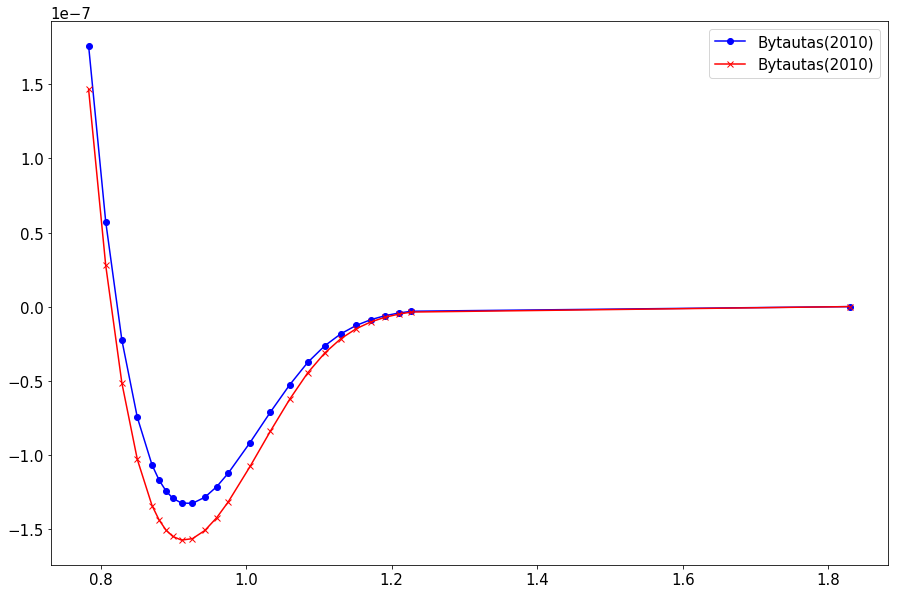

In [1110]:
# check O2 1\Delta_g and 1\Sigma_g of Bytautas2010, remove nan data
dicts = [{"mol":"O2", "state":"$^1\Delta_g$"}, {"mol":"O2", "state":"$^1\Sigma_g^+$"}]
qidxes = many_queries_many_vars_indices(dicts, list_data)
for idx in qidxes:
    print(list_data[idx]["R"], list_data[idx]["V"])
    nanidx = np.argwhere(np.isnan(list_data[idx]["V"]))[0]
    list_data[idx]["R"] = np.delete(list_data[idx]["R"], nanidx, axis=0)
    list_data[idx]["V"] = np.delete(list_data[idx]["V"], nanidx, axis=0)
plot_per_state(qidxes, list_data, shapes)

### Replot

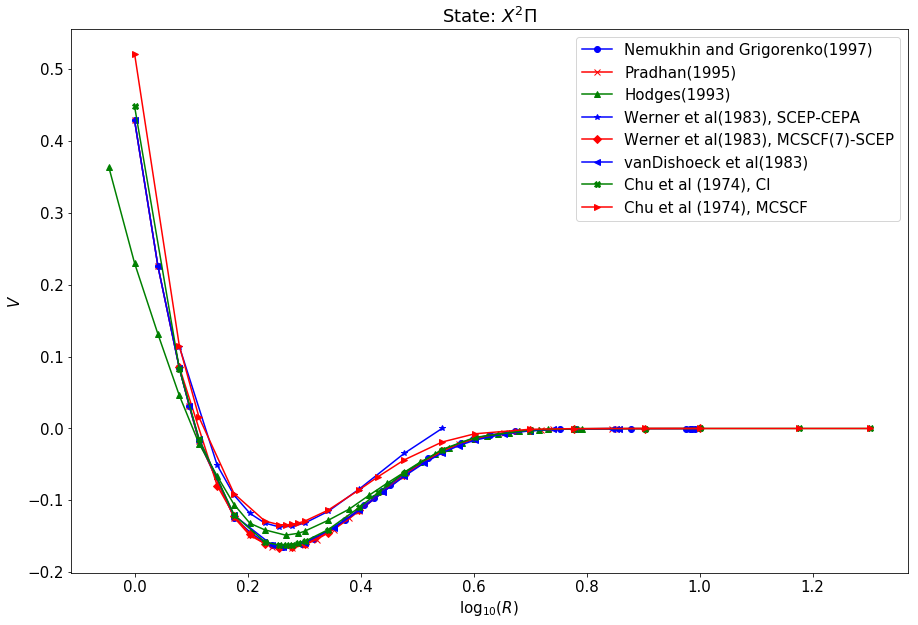

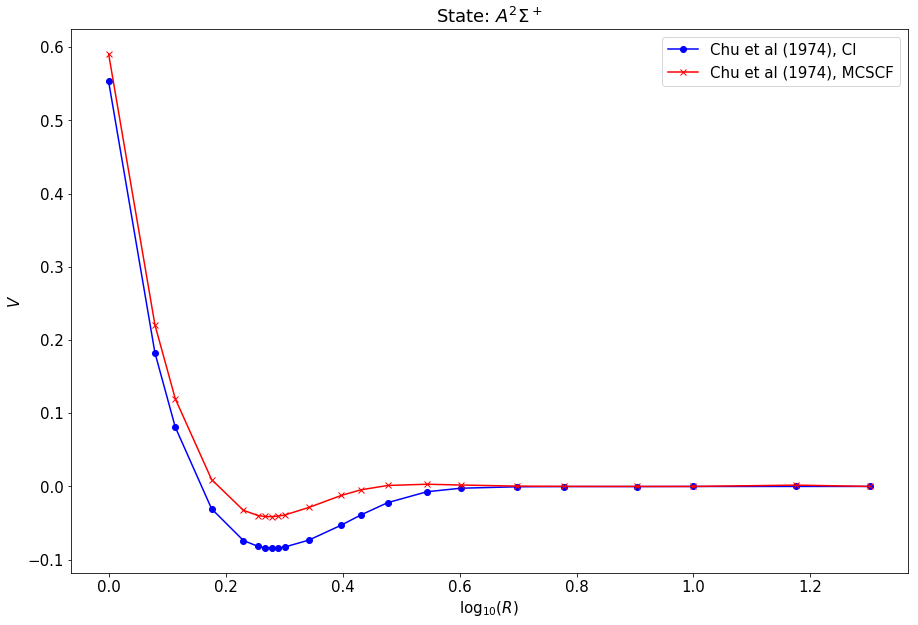

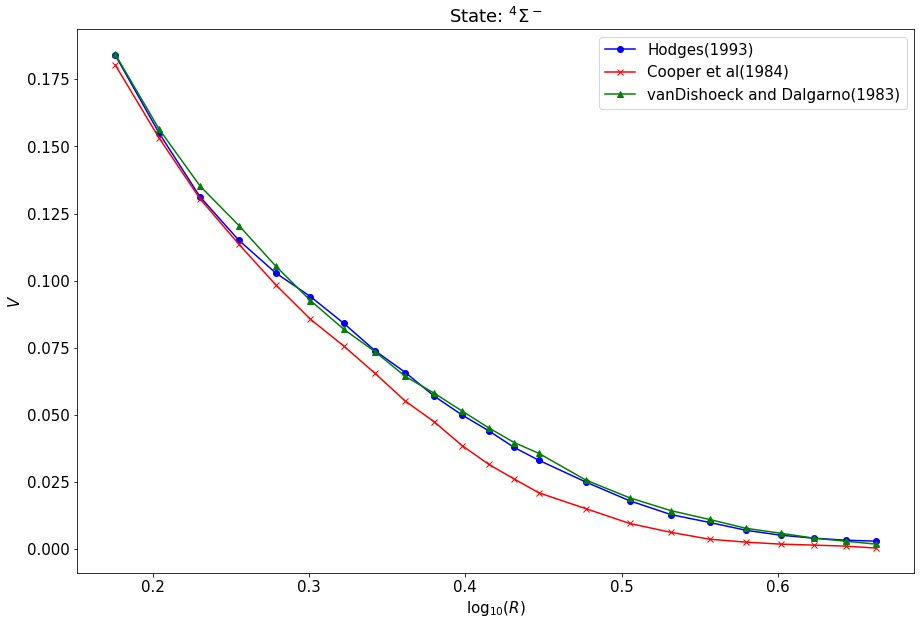

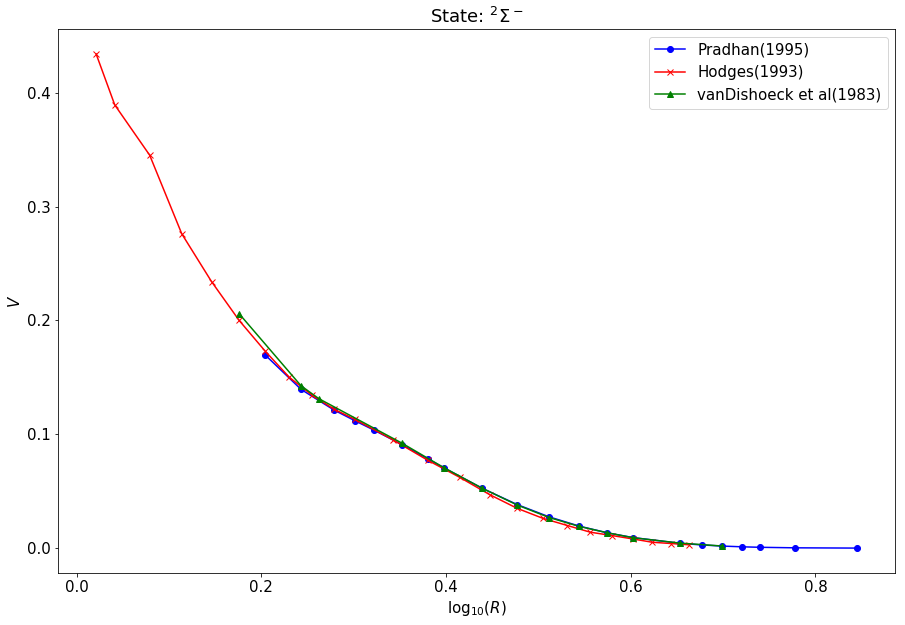

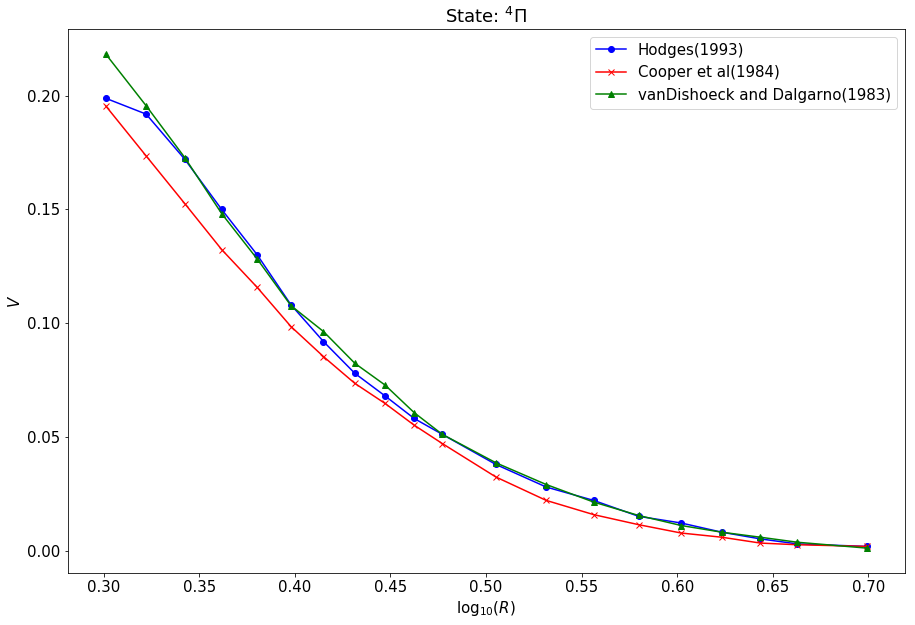

In [1111]:
matplotlib.rcParams.update({'font.size': 15})
#OH:
qidxes = query_one_var_indices("OH","mol",list_data)
ustates = list(set([list_data[idx]["state"] for idx in qidxes]))
for state in ustates:
    qidxes = query_many_vars_indices(["OH",state], ["mol","state"], list_data)
    plot_per_state(qidxes, list_data, shapes, title="State: "+state, xlabel="log$_{10}(R)$", ylabel="$V$")

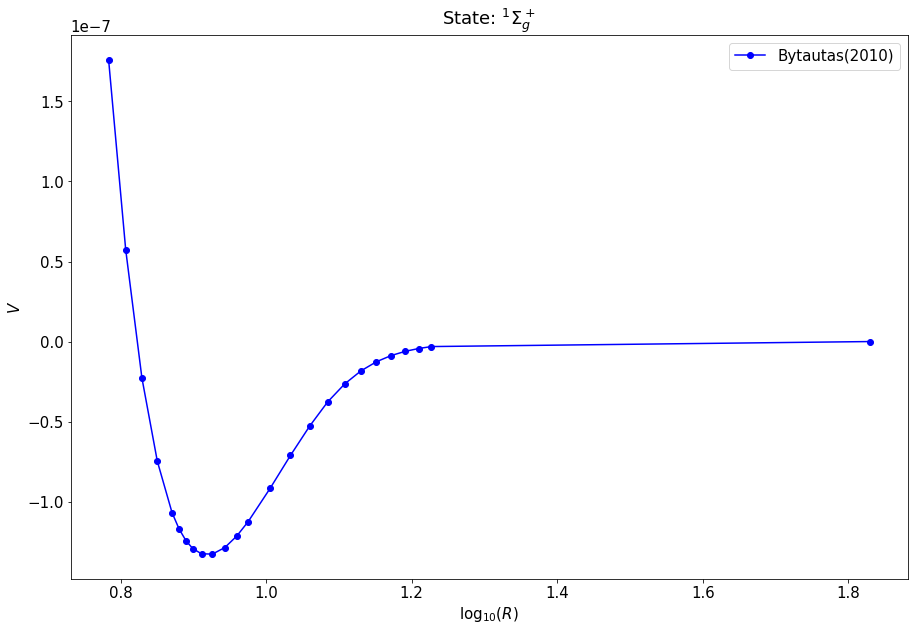

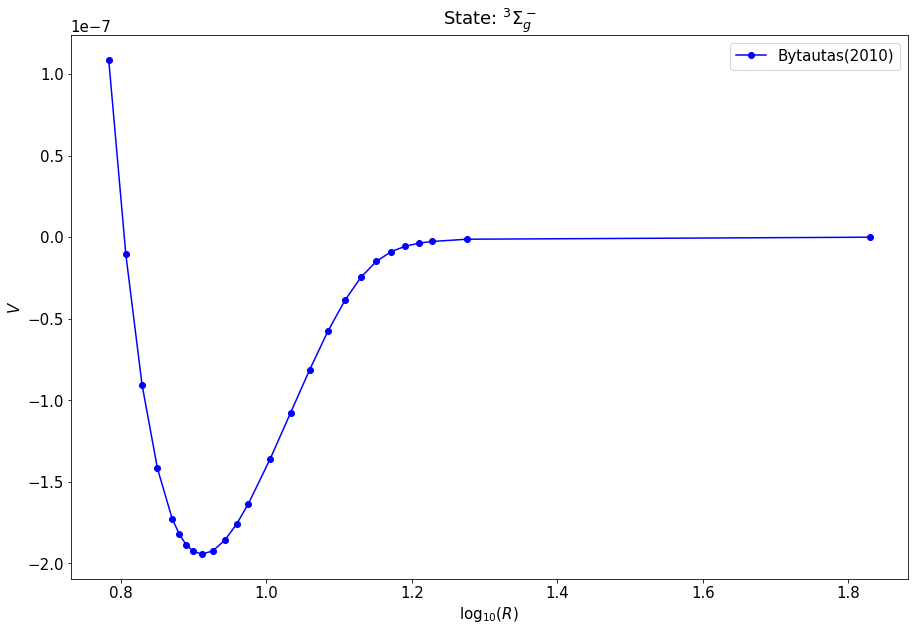

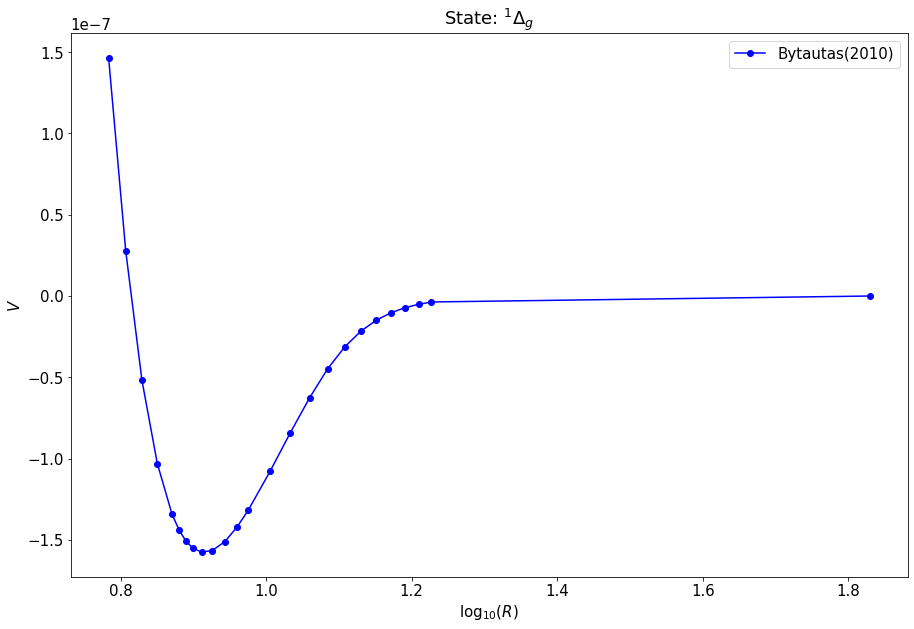

In [48]:
#O2 1deltag and 1sigmag+:
qidxes = query_one_var_indices("O2","mol",list_data)
ustates = list(set([list_data[idx]["state"] for idx in qidxes]))
for state in ustates:
    qidxes = query_many_vars_indices(["O2",state], ["mol","state"], list_data)
    plot_per_state(qidxes, list_data, shapes, title="State: "+state, xlabel="log$_{10}(R)$", ylabel="$V$")

In [1115]:
np.save('data/hxoy_data_corr_150921', list_data, allow_pickle=True) #savedata, new data

### Data iter - 160921

In [52]:
list_data = np.load('data/hxoy_data_corr_150921.npy', allow_pickle=True)
list_data = list_data[()]

#### add OH+ and O2+ data from xavier(2018)

$X^3\Sigma^-$
[ 0.94486299  1.03934929  1.13383559  1.22832189  1.32280819  1.41729449
  1.51178079  1.60626709  1.70075339  1.74799654  1.79523969  1.84248284
  1.88972599  1.93696914  1.98421229  2.03145544  2.07869859  2.17318489
  2.26767119  2.64561638  3.02356158  3.40150678  3.77945198  4.72431497
  5.66917797  6.61404096  7.55890395  8.50376695  9.44862994 11.33835593
 15.11780791 18.89725989] [[ 6.35326e-01  3.72237e-01  1.88706e-01  6.05493e-02 -2.86164e-02
  -9.00444e-02 -1.31592e-01 -1.58827e-01 -1.75736e-01 -1.81251e-01
  -1.85196e-01 -1.87811e-01 -1.89300e-01 -1.89838e-01 -1.89574e-01
  -1.88637e-01 -1.87136e-01 -1.82810e-01 -1.77199e-01 -1.49231e-01
  -1.20908e-01 -9.61468e-02 -7.53269e-02 -3.64530e-02 -1.34446e-02
  -4.11043e-03 -1.34547e-03 -5.56040e-04 -2.72970e-04 -1.45230e-04
  -4.42400e-05 -1.78600e-05]
 [ 6.34543e-01  3.71559e-01  1.88114e-01  6.00201e-02 -2.91006e-02
  -9.04944e-02 -1.32016e-01 -1.59234e-01 -1.76134e-01 -1.81647e-01
  -1.85591e-01 -1.88205e-01 -1

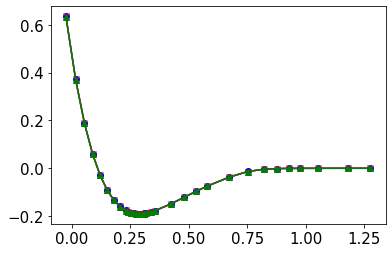

In [53]:
#OH+
f_dir = "data/"
fname ="OH+_angstrom_hartree_Xavier(2018).txt"
R = []
Vs = []
methods = []
state = None
with open(f_dir+fname) as f:
    lines = [line.rstrip() for line in f]
    for i, line in enumerate(lines):
        Vt = []
        if i==1:
            methods = line.split("#")[2:]
        elif i==0:
            state = line.split("#")[1]
        else:
            splits = line.split(" ")
            R.append(splits[0])
            for j in range(1, len(splits)):
                Vt.append(splits[j])
            Vs.append(Vt)
print(state)
R = np.array(R, dtype=float)
Vs = np.array(Vs, dtype=float).T
#immediately convert to Bohr from angstrom:
R,_ = data_conversion(R, None, R_unit="angstrom", V_unit="hartree")
print(R, Vs)
shapeidx=0
datas = []
for i, method in enumerate(methods):
    data = {"mol":"OH+", "state":state, "R":R, "V":Vs[i], "method":method, 
            "author":"Xavier(2018)", "R_unit":"bohr", "V_unit":"hartree"}
    datas.append(data)
    plt.plot(np.log10(R), Vs[i], shapes[shapeidx])
    shapeidx+=1
list_data = np.hstack([list_data, datas]) #extend the newly added data

$X^2\Pi_g$
[ 1.32280819  1.41729449  1.51178079  1.60626709  1.70075339  1.79523969
  1.88972599  1.93696914  1.98421229  2.03145544  2.07869859  2.11154203
  2.12594174  2.17318489  2.22042804  2.26767119  2.36215749  2.45664379
  2.55113008  2.64561638  2.83458898  3.02356158  3.21253418  3.40150678
  3.59047938  3.77945198  4.01566773  4.25188347  4.72431497  5.19674647
  5.66917797  6.14160946  6.37782521  6.61404096  6.85025671  7.08647246
  7.55890395  8.03133545  8.50376695  8.97619845  9.44862994  9.92106144
 10.39349294 10.86592443 11.33835593 12.28321893 13.22808192 14.17294491
 15.11780791 17.0075339  18.89725989] [[ 1.04079e+00  5.92701e-01  2.83526e-01  7.35684e-02 -6.55299e-02
  -1.54185e-01 -2.07170e-01 -2.23759e-01 -2.35197e-01 -2.42370e-01
  -2.46032e-01 -2.46855e-01 -2.46821e-01 -2.45277e-01 -2.41861e-01
  -2.36953e-01 -2.23914e-01 -2.08174e-01 -1.91137e-01 -1.73774e-01
  -1.40498e-01 -1.11333e-01 -8.72508e-02 -6.80746e-02 -5.30493e-02
  -4.12974e-02 -3.00930e-02 -2.1

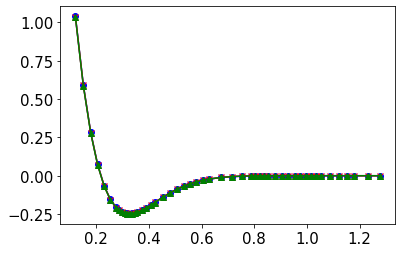

In [54]:
#O2+
f_dir = "data/"
fname ="O2+_angstrom_hartree_Xavier(2018).txt"
R = []
Vs = []
methods = []
state = None
with open(f_dir+fname) as f:
    lines = [line.rstrip() for line in f]
    for i, line in enumerate(lines):
        Vt = []
        if i==1:
            methods = line.split("#")[2:]
        elif i==0:
            state = line.split("#")[1]
        else:
            splits = line.split(" ")
            R.append(splits[0])
            for j in range(1, len(splits)):
                Vt.append(splits[j])
            Vs.append(Vt)
print(state)
R = np.array(R, dtype=float)
Vs = np.array(Vs, dtype=float).T
#immediately convert to Bohr from angstrom:
R,_ = data_conversion(R, None, R_unit="angstrom", V_unit="hartree")
print(R, Vs)
datas = []
shapeidx=0
for i, method in enumerate(methods):
    data = {"mol":"O2+", "state":state, "R":R, "V":Vs[i], "method":method, 
            "author":"Xavier(2018)", "R_unit":"bohr", "V_unit":"hartree"}
    datas.append(data)
    plt.plot(np.log10(R), Vs[i], shapes[shapeidx])
    shapeidx+=1
list_data = np.hstack([list_data, datas]) #extend the newly added data
print(list_data)

$X^3\Sigma^-$ Werner et al(1983) MCSCF(7)-SCEP 12
$X^3\Sigma^-$ Werner et al(1983) SCEP-CEPA 12
$X^3\Sigma^-$ Xavier(2018) AV5Z 32
$X^3\Sigma^-$ Xavier(2018) AV6Z 32
$X^3\Sigma^-$ Xavier(2018) CBS 32


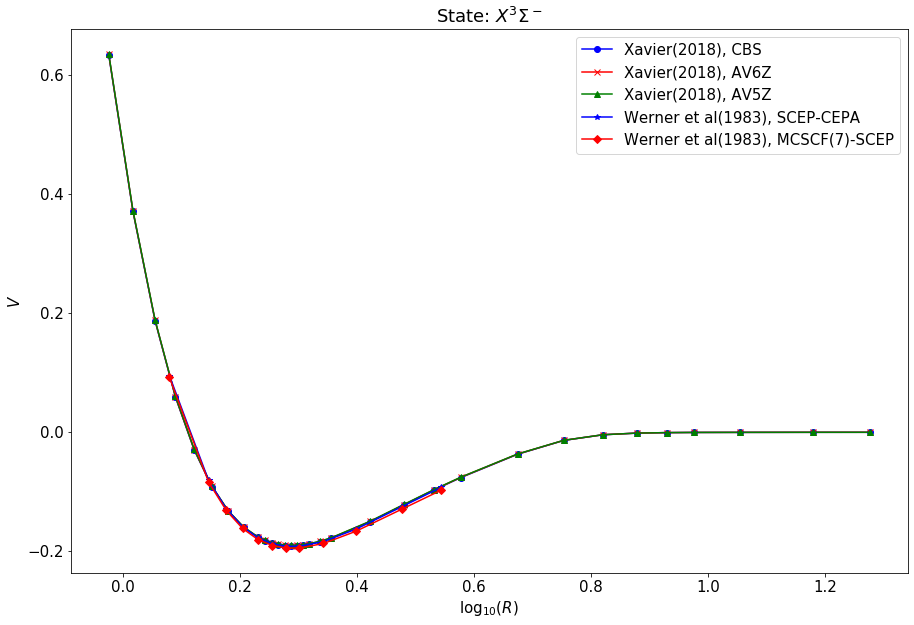

In [67]:
#plot OH+:
mol = "OH+"
qidxes = query_one_var_indices(mol, "mol", list_data)
ustates = list(set([data["state"] for data in list_data[qidxes]]))
for idx in qidxes:
    print(list_data[idx]["state"], list_data[idx]["author"], list_data[idx]["method"], len(list_data[idx]["R"]))
for state in ustates:
    qidxes = query_many_vars_indices([mol, state], ["mol", "state"], list_data)
    plot_per_state(qidxes, list_data, shapes, title="State: "+state, xlabel="log$_{10}(R)$", ylabel="$V$")


$X^2\Pi_g$ Xavier(2018) AV5Z 51
$X^2\Pi_g$ Xavier(2018) AV6Z 51
$X^2\Pi_g$ Xavier(2018) CBS 51


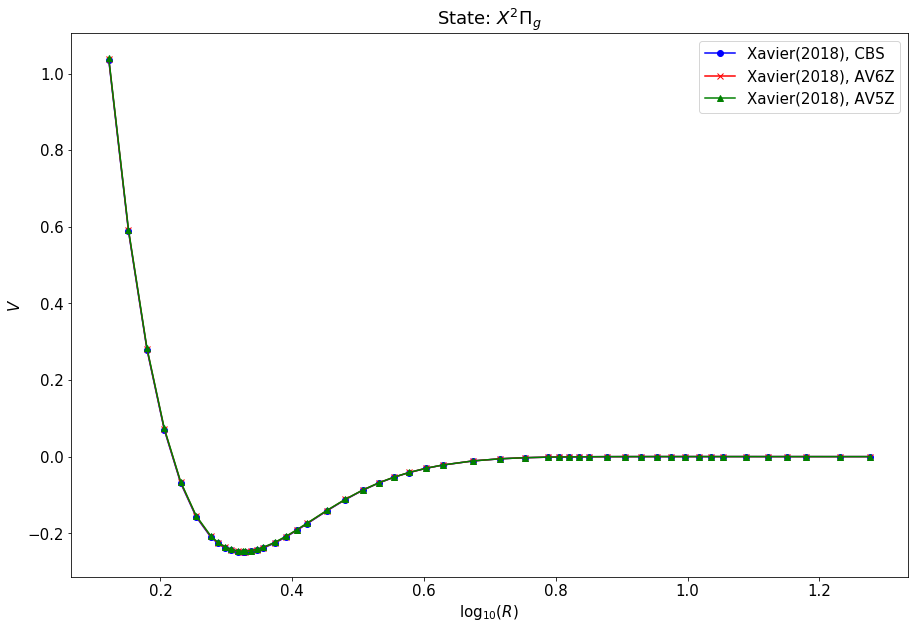

In [68]:
#plot O2+:
mol = "O2+"
qidxes = query_one_var_indices(mol, "mol", list_data)
ustates = list(set([data["state"] for data in list_data[qidxes]]))
for idx in qidxes:
    print(list_data[idx]["state"], list_data[idx]["author"], list_data[idx]["method"], len(list_data[idx]["R"]))
for state in ustates:
    qidxes = query_many_vars_indices([mol, state], ["mol", "state"], list_data)
    plot_per_state(qidxes, list_data, shapes, title="State: "+state, xlabel="log$_{10}(R)$", ylabel="$V$")